# Part I - Prosper Marketplace Loan Data Exploration
## by: Dorothy Kunth

## Table of Contents
- [Introduction](#intro)
- [Preliminary Wrangling](#wrangling)
- [The Dataset and Features](#dataset)
- [Univariate Exploration](#univariate)
   - [1. Variable of Interest - BorrowerRate](#borrowerrate)
   - [2. Variable of Interest - LoanStatus](#loanstatus)  
   - [3. Variable of Interest - ListingCategory](#listing) 
   - [4. Variable of Interest - LoanOriginalAmount](#loanamount) 
   - [5. Variable of Interest - ProsperRating (Alpha)](#rating) 
   - [6. Variable of Interest - IsBorrowerHomeowner](#homeowner)  
   - [7. Variable of Interest - Term](#term)    
   - [8. Variable of Interest - IncomeRange](#incomerange)    
   - [9. Variable of Interest - AmountDelinquent](#delinquent) 
   - [10. Variable of Interest - LoanOriginationYear](#year)
- [Inferences in Univariate Exploration](#univariate_inference)
- [Bivariate Exploration](#bivariate) 
   - [1. Pairwise Correlations between numeric variables](#pairwise)
   - [2. BorrowerRate | ProsperRating (Alpha)](#rate_rating)
   - [3. BorrowerRate | ProsperScore](#rate_score)
   - [4. BorrowerRate | IncomeRange](#rate_incomerange)
   - [5. BorrowerRate | IsBorrowerHomeowner](#rate_homeowner)
   - [6. BorrowerRate | EmploymentStatus](#rate_empstat)
   - [7. LoanOriginalAmount against Categorical Variables: ProsperRating (Alpha), EmploymentStatus and IncomeRange](#loanamt_categorical)
   - [8. LoanOriginalAmount | LoanStatus](#loanamt_stat)
   - [9. LoanOriginalAmount | ListingCategory](#loanamt_cat)
   - [10. MonthlyLoanPayment | IncomeRange](#monthlypmt_incomerange)
   - [11. LoanOriginalAmount | IsBorrowerHomeowner](#loanamt_homeowner)
   - [12. BorrowerRate | DebtToIncomeRatio | LenderYield](#rate_ratio_lenderyield)
   - [13. LoanOriginalAmount | LoanOriginationYear ](#loanamt_year)
   - [14. LoanOriginalAmount | DebtToIncomeRatio | AmountDelinquent](#loanamt_ratio_delinquent)
   - [15. LoanStatus | IncomeRange | ProsperRating (Alpha)](#loanstat_incomeramge_rating)
- [Inferences in Bivariate Exploration](#bivariate_inference)
- [Multivariate Exploration](#multivariate)   
    - [1. BorrowerRate: IncomeRange | ProsperRating (Alpha)](#rate_incomerange_rating)
    - [2. Investors: IncomeRange | ProsperRating (Alpha)](#investor_incomerange_rating)
    - [3. Investors | LenderYield | EstimatedReturn](#investor_yield_return)
    - [4. LoanOriginalAmount | BorrowerRate | ProsperScore](#loanamt_rate_score)
    - [5. LoanOriginalAmount | AmountDelinquent | DebtToIncomeRatio](#loanamt_delinquent_ratio)
- [Inferences in Multivariate Exploration](#multivariate_inference)   
- [Conclusion](#conclusion)   


<a id='intro'></a>
## Introduction
<br> The dataset that will be used in this Exploratory Data Analysis Project is a Loan Data from Prosper Marketplace. Prosper, founded in 2005 and based in San Francisco, CA is a peer-to-peer marketplace lending platform where people can invest in each other. Borrowers apply online for a fixed-rate, fixed-term loan between USD 2,000 and USD 40,000. Individuals and institutions can invest in the loans and earn attractive returns. Prosper handles all loan servicing on behalf of the matched borrowers and investors. In simple words, when you get a loan from Prosper, you’re not actually getting the money from Prosper. Instead, the company acts as a broker, matching investors with would-be borrowers and charging a fee for its matchmaking services. <br>

<br> The dataset contains 113,937 loans with origination dates between 2005 and 2014. It has 81 variables on each loan such as loan amount, loan status, borrower rate, term, borrower's income range, employment status, Prosper rating, Prosper score and many others.<br>

<a id='wrangling'></a>
## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in dataset, describe its properties, select features to explore, do necessary cleaning or transformation

In [2]:
df = pd.read_csv('prosper_loan_data.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
# select the variables/columns to explore and store in df_prosper dataframe
target_columns = [
    'LoanOriginationDate', 'LoanOriginalAmount', 'MonthlyLoanPayment', 'Term', 'LoanStatus', 'ListingCategory (numeric)',
    'BorrowerRate', 'LenderYield', 'EstimatedReturn', 'ProsperRating (Alpha)', 'ProsperScore', 'EmploymentStatus', 
    'IsBorrowerHomeowner', 'CurrentDelinquencies', 'AmountDelinquent', 'DebtToIncomeRatio',
    'IncomeRange', 'TotalProsperLoans', 'Investors'
]

df_prosper = df[target_columns]

In [4]:
df_prosper.shape

(113937, 19)

In [5]:
df_prosper.head()

,LoanOriginationDate,LoanOriginalAmount,MonthlyLoanPayment,Term,LoanStatus,ListingCategory (numeric),BorrowerRate,LenderYield,EstimatedReturn,ProsperRating (Alpha),ProsperScore,EmploymentStatus,IsBorrowerHomeowner,CurrentDelinquencies,AmountDelinquent,DebtToIncomeRatio,IncomeRange,TotalProsperLoans,Investors
0,2007-09-12 00:00:00,9425,330.43,36,Completed,0,0.1580,0.1380,NaN,NaN,NaN,Self-employed,True,2.0,472.0,0.17,"$25,000-49,999",NaN,258
1,2014-03-03 00:00:00,10000,318.93,36,Current,2,0.0920,0.0820,0.05470,A,7.0,Employed,False,0.0,0.0,0.18,"$50,000-74,999",NaN,1
2,2007-01-17 00:00:00,3001,123.32,36,Completed,0,0.2750,0.2400,NaN,NaN,NaN,Not available,False,1.0,NaN,0.06,Not displayed,NaN,41
3,2012-11-01 00:00:00,10000,321.45,36,Current,16,0.0974,0.0874,0.06000,A,9.0,Employed,True,4.0,10056.0,0.15,"$25,000-49,999",NaN,158
4,2013-09-20 00:00:00,15000,563.97,36,Current,2,0.2085,0.1985,0.09066,D,4.0,Employed,True,0.0,0.0,0.26,"$100,000+",1.0,20


In [6]:
df_prosper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 19 columns):
LoanOriginationDate          113937 non-null object
LoanOriginalAmount           113937 non-null int64
MonthlyLoanPayment           113937 non-null float64
Term                         113937 non-null int64
LoanStatus                   113937 non-null object
ListingCategory (numeric)    113937 non-null int64
BorrowerRate                 113937 non-null float64
LenderYield                  113937 non-null float64
EstimatedReturn              84853 non-null float64
ProsperRating (Alpha)        84853 non-null object
ProsperScore                 84853 non-null float64
EmploymentStatus             111682 non-null object
IsBorrowerHomeowner          113937 non-null bool
CurrentDelinquencies         113240 non-null float64
AmountDelinquent             106315 non-null float64
DebtToIncomeRatio            105383 non-null float64
IncomeRange                  113937 non-null object
Total

In [7]:
# convert LoanOriginationDate data type to datetime
df_prosper['LoanOriginationDate'] = pd.to_datetime(df_prosper['LoanOriginationDate'])
df_prosper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 19 columns):
LoanOriginationDate          113937 non-null datetime64[ns]
LoanOriginalAmount           113937 non-null int64
MonthlyLoanPayment           113937 non-null float64
Term                         113937 non-null int64
LoanStatus                   113937 non-null object
ListingCategory (numeric)    113937 non-null int64
BorrowerRate                 113937 non-null float64
LenderYield                  113937 non-null float64
EstimatedReturn              84853 non-null float64
ProsperRating (Alpha)        84853 non-null object
ProsperScore                 84853 non-null float64
EmploymentStatus             111682 non-null object
IsBorrowerHomeowner          113937 non-null bool
CurrentDelinquencies         113240 non-null float64
AmountDelinquent             106315 non-null float64
DebtToIncomeRatio            105383 non-null float64
IncomeRange                  113937 non-null obje

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [8]:
# extract year from LoanOriginationDate and store in a new column LoanOriginationYear 
df_prosper['LoanOriginationYear'] = df_prosper['LoanOriginationDate'].dt.year
df_prosper.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,LoanOriginationDate,LoanOriginalAmount,MonthlyLoanPayment,Term,LoanStatus,ListingCategory (numeric),BorrowerRate,LenderYield,EstimatedReturn,ProsperRating (Alpha),ProsperScore,EmploymentStatus,IsBorrowerHomeowner,CurrentDelinquencies,AmountDelinquent,DebtToIncomeRatio,IncomeRange,TotalProsperLoans,Investors,LoanOriginationYear
0,2007-09-12,9425,330.43,36,Completed,0,0.1580,0.1380,NaN,NaN,NaN,Self-employed,True,2.0,472.0,0.17,"$25,000-49,999",NaN,258,2007
1,2014-03-03,10000,318.93,36,Current,2,0.0920,0.0820,0.05470,A,7.0,Employed,False,0.0,0.0,0.18,"$50,000-74,999",NaN,1,2014
2,2007-01-17,3001,123.32,36,Completed,0,0.2750,0.2400,NaN,NaN,NaN,Not available,False,1.0,NaN,0.06,Not displayed,NaN,41,2007
3,2012-11-01,10000,321.45,36,Current,16,0.0974,0.0874,0.06000,A,9.0,Employed,True,4.0,10056.0,0.15,"$25,000-49,999",NaN,158,2012
4,2013-09-20,15000,563.97,36,Current,2,0.2085,0.1985,0.09066,D,4.0,Employed,True,0.0,0.0,0.26,"$100,000+",1.0,20,2013


> I prefer to convert the ListingCategory (numeric) values into its corresponding descriptive values for better understanding of the category then I will rename the column as ListingCategory.

- 0 - Not Available
- 1 - Debt Consolidation
- 2 - Home Improvement
- 3 - Business
- 4 - Personal Loan
- 5 - Student Use
- 6 - Auto
- 7 - Other
- 8 - Baby&Adoption
- 9 - Boat
- 10 - Cosmetic Procedure
- 11 - Engagement Ring
- 12 - Green Loans
- 13 - Household Expenses
- 14 - Large Purchases
- 15 - Medical/Dental
- 16 - Motorcycle
- 17 - RV
- 18 - Taxes
- 19 - Vacation
- 20 - Wedding Loans

source: [Prosper Loan Data Dictionary](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0)

In [9]:
# change ListingCategory (numeric) values from integers to descriptive text values
df_prosper.loc[df_prosper['ListingCategory (numeric)'] == 0, 'ListingCategory (numeric)'] = 'Not Available'
df_prosper.loc[df_prosper['ListingCategory (numeric)'] == 1, 'ListingCategory (numeric)'] = 'Debt Consolidation'
df_prosper.loc[df_prosper['ListingCategory (numeric)'] == 2, 'ListingCategory (numeric)'] = 'Home Improvement'
df_prosper.loc[df_prosper['ListingCategory (numeric)'] == 3, 'ListingCategory (numeric)'] = 'Business'
df_prosper.loc[df_prosper['ListingCategory (numeric)'] == 4, 'ListingCategory (numeric)'] = 'Personal Loan'
df_prosper.loc[df_prosper['ListingCategory (numeric)'] == 5, 'ListingCategory (numeric)'] = 'Student Use'
df_prosper.loc[df_prosper['ListingCategory (numeric)'] == 6, 'ListingCategory (numeric)'] = 'Auto'
df_prosper.loc[df_prosper['ListingCategory (numeric)'] == 7, 'ListingCategory (numeric)'] = 'Other'
df_prosper.loc[df_prosper['ListingCategory (numeric)'] == 8, 'ListingCategory (numeric)'] = 'Baby&Adoption'
df_prosper.loc[df_prosper['ListingCategory (numeric)'] == 9, 'ListingCategory (numeric)'] = 'Boat'
df_prosper.loc[df_prosper['ListingCategory (numeric)'] == 10, 'ListingCategory (numeric)'] = 'Cosmetic Procedure'
df_prosper.loc[df_prosper['ListingCategory (numeric)'] == 11, 'ListingCategory (numeric)'] = 'Engagement Ring'
df_prosper.loc[df_prosper['ListingCategory (numeric)'] == 12, 'ListingCategory (numeric)'] = 'Green Loans'
df_prosper.loc[df_prosper['ListingCategory (numeric)'] == 13, 'ListingCategory (numeric)'] = 'Household Expenses'
df_prosper.loc[df_prosper['ListingCategory (numeric)'] == 14, 'ListingCategory (numeric)'] = 'Large Purchases'
df_prosper.loc[df_prosper['ListingCategory (numeric)'] == 15, 'ListingCategory (numeric)'] = 'Medical/Dental'
df_prosper.loc[df_prosper['ListingCategory (numeric)'] == 16, 'ListingCategory (numeric)'] = 'Motorcycle'
df_prosper.loc[df_prosper['ListingCategory (numeric)'] == 17, 'ListingCategory (numeric)'] = 'RV'
df_prosper.loc[df_prosper['ListingCategory (numeric)'] == 18, 'ListingCategory (numeric)'] = 'Taxes'
df_prosper.loc[df_prosper['ListingCategory (numeric)'] == 19, 'ListingCategory (numeric)'] = 'Vacation'
df_prosper.loc[df_prosper['ListingCategory (numeric)'] == 20, 'ListingCategory (numeric)'] = 'Wedding Loans'

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [10]:
# rename column from ListingCategory (numeric) to ListingCategory
df_prosper.rename(columns={'ListingCategory (numeric)':'ListingCategory'}, inplace = True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


> In my opinion, the following categorical variables have natural orders, therefore I will convert these columns from a plain object type into an ordered categorical type:

- 1. ProsperRating (Alpha)
- 2. IncomeRange
- 3. LoanStatus

In [11]:
df_prosper['ProsperRating (Alpha)'].value_counts()

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating (Alpha), dtype: int64

In [12]:
df_prosper['IncomeRange'].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [13]:
df_prosper['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [14]:
# convert ProsperRating (Alpha), IncomeRange, and LoanStatus into ordered categorical types
ordinal_var_dict = {'ProsperRating (Alpha)': ['HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
                    'IncomeRange': ['Not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999', 
                     '$50,000-74,999', '$75,000-99,999', '$100,000+'],
                    'LoanStatus': ['Cancelled', 'Defaulted', 'Chargedoff', 'Past Due (>120 days)', 'Past Due (91-120 days)', 
                                   'Past Due (61-90 days)', 'Past Due (31-60 days)', 'Past Due (16-30 days)',
                                   'Past Due (1-15 days)', 'FinalPaymentInProgress', 'Current', 'Completed']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df_prosper[var] = df_prosper[var].astype(ordered_var)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [15]:
df_prosper.isna().sum()

LoanOriginationDate          0
LoanOriginalAmount           0
MonthlyLoanPayment           0
Term                         0
LoanStatus                   0
ListingCategory              0
BorrowerRate                 0
LenderYield                  0
EstimatedReturn          29084
ProsperRating (Alpha)    29084
ProsperScore             29084
EmploymentStatus          2255
IsBorrowerHomeowner          0
CurrentDelinquencies       697
AmountDelinquent          7622
DebtToIncomeRatio         8554
IncomeRange                  0
TotalProsperLoans        91852
Investors                    0
LoanOriginationYear          0
dtype: int64

> I decided to fill in the null values for EmploymentStatus with 'Not available'. 'Not available' is already an existing value for those borrowers who did not state their employment status.

> I will also fill in the null values for numeric variables with 0.

In [16]:
# fill the null values with 'not stated' for EmploymentStatus
# fill the null values with 0 for CurrentDelinquencies, AmountDelinquent, DebtToIncomeRatio and TotalProsperLoans
df_prosper['EmploymentStatus'] = df_prosper['EmploymentStatus'].fillna('Not available')
df_prosper['CurrentDelinquencies'] = df_prosper['CurrentDelinquencies'].fillna(0)
df_prosper['AmountDelinquent'] = df_prosper['AmountDelinquent'].fillna(0)
df_prosper['DebtToIncomeRatio'] = df_prosper['DebtToIncomeRatio'].fillna(0)
df_prosper['TotalProsperLoans'] = df_prosper['TotalProsperLoans'].fillna(0)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [17]:
print(df_prosper.shape)
df_prosper.isna().sum()

(113937, 20)


LoanOriginationDate          0
LoanOriginalAmount           0
MonthlyLoanPayment           0
Term                         0
LoanStatus                   0
ListingCategory              0
BorrowerRate                 0
LenderYield                  0
EstimatedReturn          29084
ProsperRating (Alpha)    29084
ProsperScore             29084
EmploymentStatus             0
IsBorrowerHomeowner          0
CurrentDelinquencies         0
AmountDelinquent             0
DebtToIncomeRatio            0
IncomeRange                  0
TotalProsperLoans            0
Investors                    0
LoanOriginationYear          0
dtype: int64

> There are 29084 records with null values in EstimatedReturn, ProsperRating (Alpha) and ProsperScore columns as these features are applicable only for loans originated after July 2009. Since it is a lot of records - about 25% of the total records, I prefer to keep the dataframe as it is. I will then have to create a separate dataframe where EstimatedReturn, ProsperRating (Alpha) and ProsperScore are not null for investigations involving the said features.

In [18]:
# select records where 'ProsperRating (Alpha)' is not null and store in df_prosper_rating dataframe
df_prosper_rating = df_prosper[df_prosper['ProsperRating (Alpha)'].notnull()]
df_prosper_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 20 columns):
LoanOriginationDate      84853 non-null datetime64[ns]
LoanOriginalAmount       84853 non-null int64
MonthlyLoanPayment       84853 non-null float64
Term                     84853 non-null int64
LoanStatus               84853 non-null category
ListingCategory          84853 non-null object
BorrowerRate             84853 non-null float64
LenderYield              84853 non-null float64
EstimatedReturn          84853 non-null float64
ProsperRating (Alpha)    84853 non-null category
ProsperScore             84853 non-null float64
EmploymentStatus         84853 non-null object
IsBorrowerHomeowner      84853 non-null bool
CurrentDelinquencies     84853 non-null float64
AmountDelinquent         84853 non-null float64
DebtToIncomeRatio        84853 non-null float64
IncomeRange              84853 non-null category
TotalProsperLoans        84853 non-null float64
Investors                

In [19]:
df_prosper.describe()

,LoanOriginalAmount,MonthlyLoanPayment,Term,BorrowerRate,LenderYield,EstimatedReturn,ProsperScore,CurrentDelinquencies,AmountDelinquent,DebtToIncomeRatio,TotalProsperLoans,Investors,LoanOriginationYear
count,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,84853.000000,84853.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,8337.01385,272.475783,40.830248,0.192764,0.182701,0.096068,5.950067,0.588430,918.646866,0.255229,0.275459,80.475228,2011.042611
std,6245.80058,192.697812,10.436212,0.074818,0.074516,0.030403,2.376501,1.973185,6919.065398,0.535602,0.654774,103.239020,2.506634
min,1000.00000,0.000000,12.000000,0.000000,-0.010000,-0.182700,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2005.000000
25%,4000.00000,131.620000,36.000000,0.134000,0.124200,0.074080,4.000000,0.000000,0.000000,0.130000,0.000000,2.000000,2008.000000
50%,6500.00000,217.740000,36.000000,0.184000,0.173000,0.091700,6.000000,0.000000,0.000000,0.210000,0.000000,44.000000,2012.000000
75%,12000.00000,371.580000,36.000000,0.250000,0.240000,0.116600,8.000000,0.000000,0.000000,0.310000,0.000000,115.000000,2013.000000
max,35000.00000,2251.510000,60.000000,0.497500,0.492500,0.283700,11.000000,83.000000,463881.000000,10.010000,8.000000,1189.000000,2014.000000


<a id='dataset'></a>
## The Dataset and Features


### What is the structure of your dataset?

The original dataset contains 113,937 loans with 81 variables. Out of 81 variables, 20 were seleced for the purpose of Exploratory Data Analysis.

- 1. LoanOriginationDate
- 2. LoanOriginalAmount
- 3. MonthlyLoanPayment
- 4. Term
- 5. LoanStatus
- 6. ListingCategory 
- 7. BorrowerRate
- 8. LenderYield
- 9. EstimatedReturn          
- 10. ProsperRating (Alpha)
- 11. ProsperScore
- 12. EmploymentStatus
- 13. IsBorrowerHomeowner
- 14. CurrentDelinquencies
- 15. AmountDelinquent
- 16. DebtToIncomeRatio
- 17. IncomeRange
- 18. TotalProsperLoans
- 19. Investors
- 20. LoanOriginationYear

***ProsperRating (Alpha)*** is expressed as a letter grade that indicates the expected level of risk associated with a loan listing. It is ordered in the following levels from low risk to high risk: **AA, A, B, C, D, E, HR.**

***ProsperScore*** is a custom risk score built using historical Prosper data. The score ranges from **1-11**, with 11 being the best, or lowest risk score.

***IncomeRange*** is the annual income range of the borrower at the time the listing was created. It is ordered in the following levels from low to high range: **Not displayed, Not employed, `$0`, `$1-24,999`, `$25,000-49,999`, `$50,000-74,999`, `$75,000-99,999`, `$100,000+`.**

***LoanStatus*** describes the current status of the loan and is ordered in the following levels: **Cancelled, Defaulted, Chargedoff, Past Due (>120 days), Past Due (91-120 days), Past Due (61-90 days), Past Due (31-60 days), Past Due (16-30 days), Past Due (1-15 days), FinalPaymentInProgress, Current, Completed.**

***Loan origination*** is defined as the process by which a borrower applies for a new loan, and a lender processes that application. Origination generally includes all the steps from taking a loan application up to disbursal of funds (or declining the application).

Sources: 
- [Prosper Zendesk](https://prosper.zendesk.com/hc/en-us/articles/210013633-Where-can-I-view-my-Notes-and-their-payment-histories-)
- [Loan Origination Wiki](https://en.wikipedia.org/wiki/Loan_origination)


### What are the main features of interest in your dataset?

There are a good number of variables to explore. However, I am interested to figure out:

- 1. What features strongly affect the borrower rate?
- 2. What loan features affect the origination of the loans?
- 3. What borrower's information that affect origination of the loans?
- 4. For the investor side, do the LenderYield (LenderYield or investor yield = borrower rate + service fee) and EstimatedReturn affect the origination of loans? 
- 5. How the overall loan size is distributed based on different features like term, rating, loan status, borrower rate, category, income range, year, etc.


### What features in the dataset do you think will help support your investigation into your features of interest?

- 1. From my perspective, I expect that the Prosper rating and Prosper score would have a strong effect on borrower rate - the higher the rating and score are, the lower the borrower rate. 
- 2. I also expect that the originaton of the loans is affected by several factors, most specifically the borrower's credit profile such as score, deliquency info, and borrower's employment status and income, etc.


<a id='univariate'></a>
## Univariate Exploration 

In the Univariate Exploration, I will be investigating the distribution of the following variables:

1. BorrowerRate
2. LoanStatus
3. ListingCategory
4. LoanOriginalAmount 
5. ProsperRating (Alpha)
6. IsBorrowerHomeowner
7. Term
8. IncomeRange
9. AmountDelinquent
10. LoanOriginationYear

<a id='borrowerrate'></a>
### 1. Variable of Interest - BorrowerRate

**How does the distribution of the borrower rate look like?**

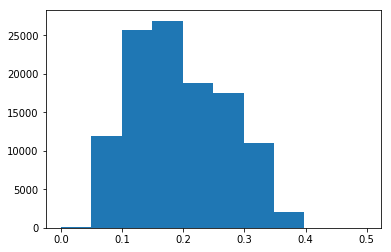

In [20]:
# start with a standard-scaled plot
plt.hist(data=df_prosper, x = 'BorrowerRate');

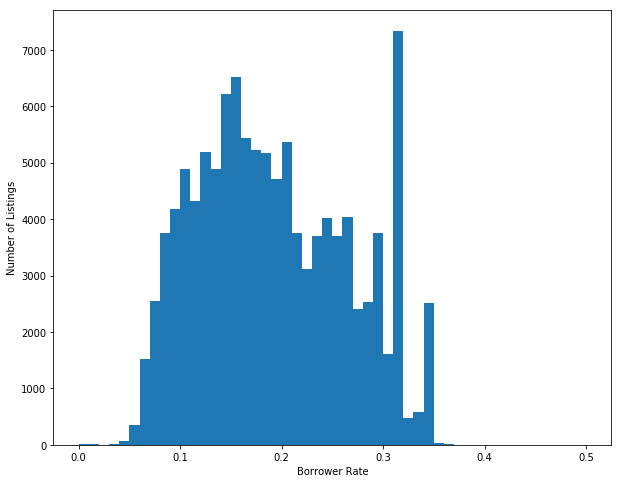

In [21]:
# adjust the bins, figure size, add labels
bins = np.arange(0, df_prosper['BorrowerRate'].max()+0.01, 0.01)
plt.figure(figsize=[10, 8])
plt.hist(data=df_prosper, x = 'BorrowerRate', bins = bins);
plt.xlabel('Borrower Rate');
plt.ylabel('Number of Listings');

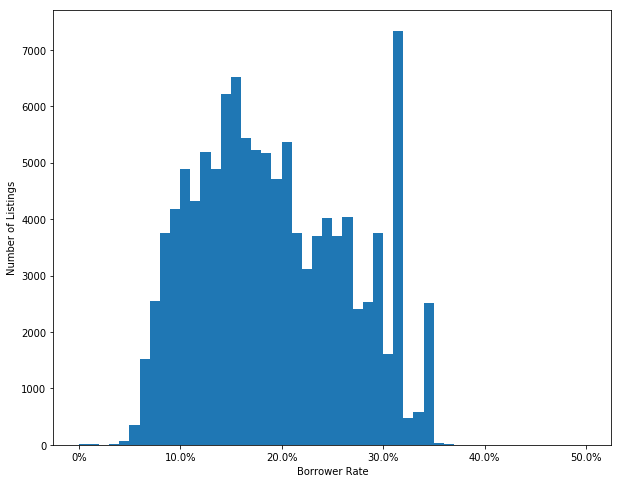

In [22]:
# change x ticks to percentage
bins = np.arange(0, df_prosper['BorrowerRate'].max()+0.01, 0.01)
plt.figure(figsize=[10, 8])
plt.hist(data=df_prosper, x = 'BorrowerRate', bins = bins);
plt.xlabel('Borrower Rate');
plt.ylabel('Number of Listings');
xticks = [0, 0.10, 0.20, 0.30, 0.40, 0.50]
xtick_vals = ['{}%'.format(x*100) for x in xticks]
plt.xticks(xticks, xtick_vals);

**Observation: It appears that the loans are spread in the borrower rate range of 10 to 30% and there is a high peak somewhere around 31-32%.**

<a id='loanstatus'></a>
### 2. Variable of Interest - LoanStatus

**How does the distribution of categorical variable LoanStatus look like? What is the status of majority of the loans?**

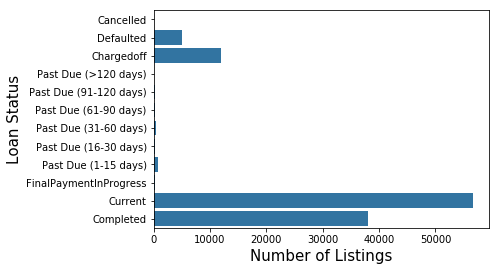

In [23]:
# create a bar chart using Seaborn's countplot function, use base_color and add labels
base_color = sb.color_palette()[0]
stat_bar = sb.countplot(data=df_prosper, y = 'LoanStatus', color = base_color);
stat_bar.set_xlabel("Number of Listings", fontsize = 15);
stat_bar.set_ylabel("Loan Status", fontsize = 15);

> Alternatively, we can have the x axis in terms of counts or number of listings and use text on the bars to show the proportion.**

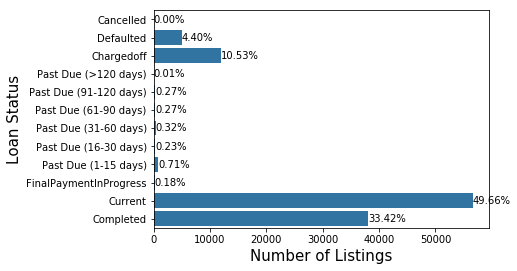

In [24]:
# 1. Find the frequency of unique values in the LoanStatus column
LoanStatus_counts = df_prosper['LoanStatus'].value_counts()

# 2. Find the length of the longest bar in terms of proportion
# Returns the sum of all not-null values in LoanStatus column
n_LoanStatus = df_prosper['LoanStatus'].value_counts().sum()

# Return the highest frequency in the LoanStatus column
max_LoanStatus_count = LoanStatus_counts[0]

# compute the length of the longest bar in terms of the proportion
max_prop = max_LoanStatus_count / n_LoanStatus

# 3. Print the text (proportion) on the bars of a horizontal plot
# Logic to print the proportion text on the bars
for i in range (LoanStatus_counts.shape[0]):
    count = LoanStatus_counts[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.2f}%'.format(100 * count / n_LoanStatus)
    # Print the string value on the bar. 
    plt.text(count + 1, i, pct_string, va='center')

stat_bar = sb.countplot(data=df_prosper, y = 'LoanStatus', color = base_color);
stat_bar.set_xlabel("Number of Listings", fontsize = 15);
stat_bar.set_ylabel("Loan Status", fontsize = 15);
sb.set(rc = {'figure.figsize':(20,10)});

**Observation: It appears that majority of the loans are current and completed. Past Due loans are split into several buckets based on days overdue. There is also a significant number of charged off loans.**

- A loan is considered “charged-off” after a borrower misses 5 consecutive monthly payments. At that point, the loan is considered unlikely to be repaid. [What does it mean for a loan to be charged-off?](https://prosper.zendesk.com/hc/en-us/articles/210013713-What-does-it-mean-for-a-loan-to-be-charged-off-)

<a id='listing'></a>
### 3. Variable of Interest - ListingCategory

**How does the distribution of ListingCategory look like? What category or purpose the majority of the loans are for?**

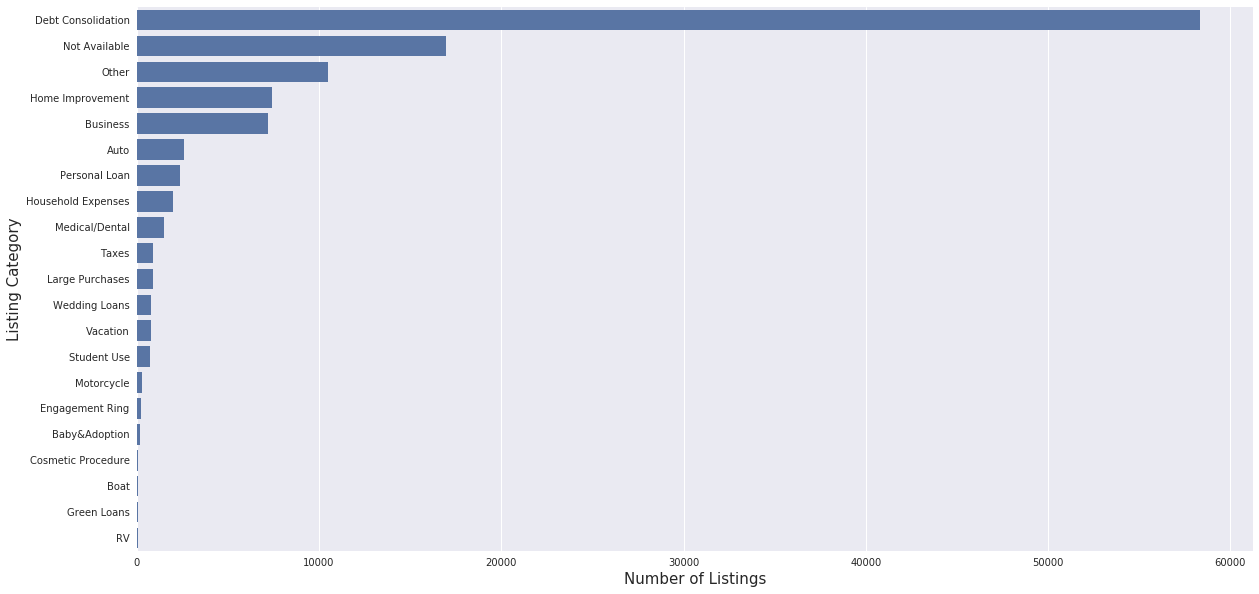

In [25]:
# create a bar chart using Seaborn's countplot function, use base_color, set in descending order and add labels
cat_order = df_prosper['ListingCategory'].value_counts().index
base_color = sb.color_palette()[0]
cat_bar = sb.countplot(data=df_prosper, y = 'ListingCategory', color = base_color, order = cat_order);
cat_bar.set_xlabel("Number of Listings", fontsize = 15);
cat_bar.set_ylabel("Listing Category", fontsize = 15);

**Observation: It shows that debt consolidation is most common reason or purpose of taking the loan through Prosper.**

<a id='loanamount'></a>
### 4. Variable of Interest - LoanOriginalAmount

**How does the distribution of LoanOriginalAmount look like?**

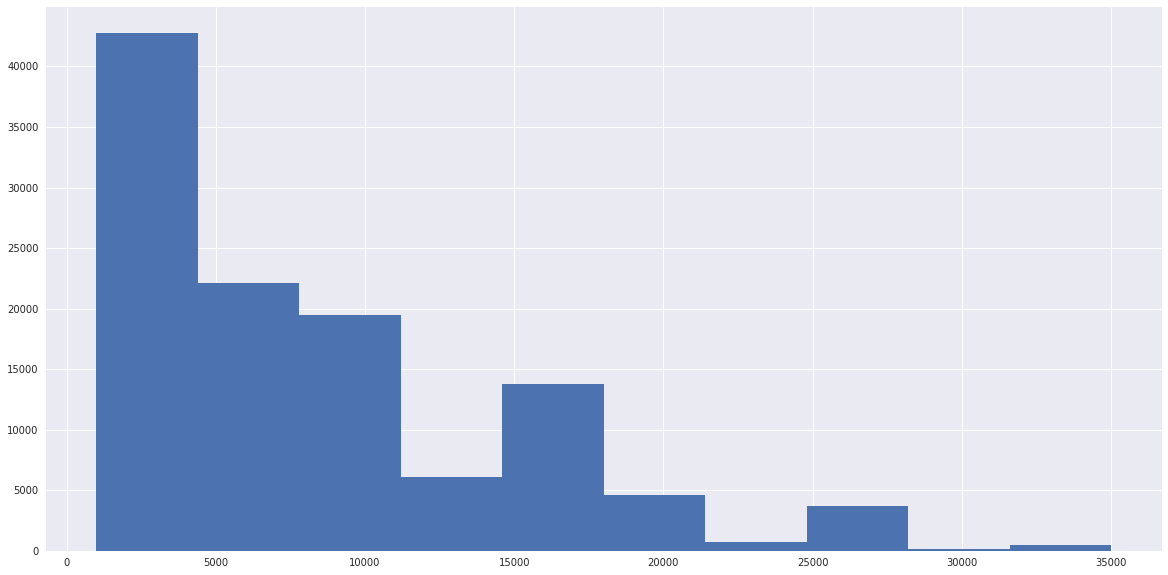

In [26]:
# start with a standard-scaled plot
plt.hist(data=df_prosper, x = 'LoanOriginalAmount');

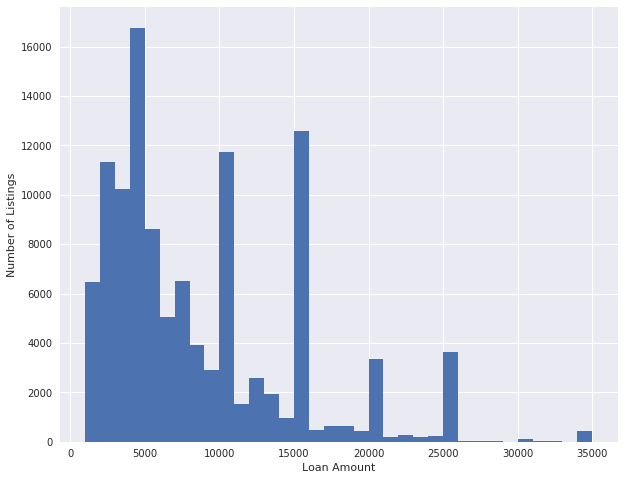

In [27]:
# adjust the bins, figure size, add labels
bins = np.arange(1000, df_prosper['LoanOriginalAmount'].max() + 1000, 1000)
plt.figure(figsize=[10, 8])
plt.hist(data=df_prosper, x = 'LoanOriginalAmount', bins = bins);
plt.xlabel('Loan Amount');
plt.ylabel('Number of Listings');

**Observation: Based on the histogram, the top 3 loan amounts are USD 4,000.00, USD 15,000.00 and USD 10,000.00 respectively.**

<a id='rating'></a>
### 5. Variable of Interest - ProsperRating (Alpha)

**How does the distribution of ProsperRating (Alpha) look like? What is the rating of the majority of the loans?**

> For the purpose of this investigation on ProsperRating (Alpha), I will use df_prosper_rating dataframe that includes only records where ProsperRating (Alpha) is not null as there are 29084 missing values. ProsperRating is only applicable for loans originated after July 2009.

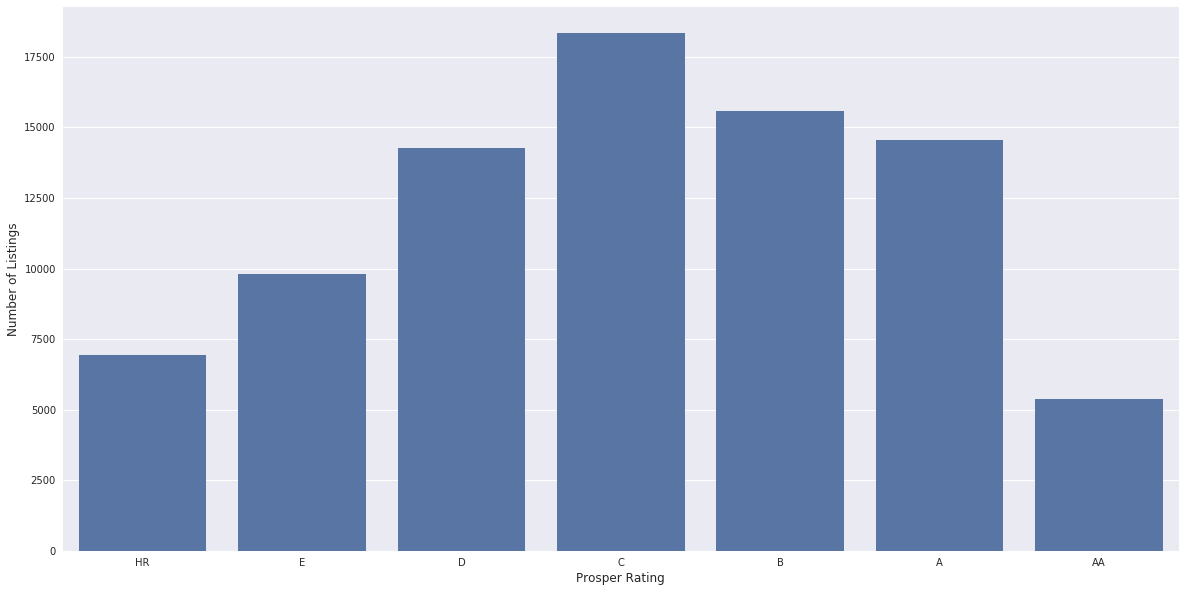

In [28]:
# create a bar chart using seaborn's countplot, use base_color and add labels
base_color = sb.color_palette()[0]
rating_bar = sb.countplot(data = df_prosper_rating, x = 'ProsperRating (Alpha)', color = base_color);
rating_bar.set_xlabel("Prosper Rating", fontsize = 12);
rating_bar.set_ylabel("Number of Listings", fontsize = 12);

**Observation: The highest rating AA has the least number of loans and rating C is the highest. It's interesting to see that a significant number of loans has the lowest rating HR (high risk).**

<a id='homeowner'></a>
### 6. Variable of Interest - IsBorrowerHomeowner

**How does the distribution of borrowers that are homeowners and not homeowners look like?**

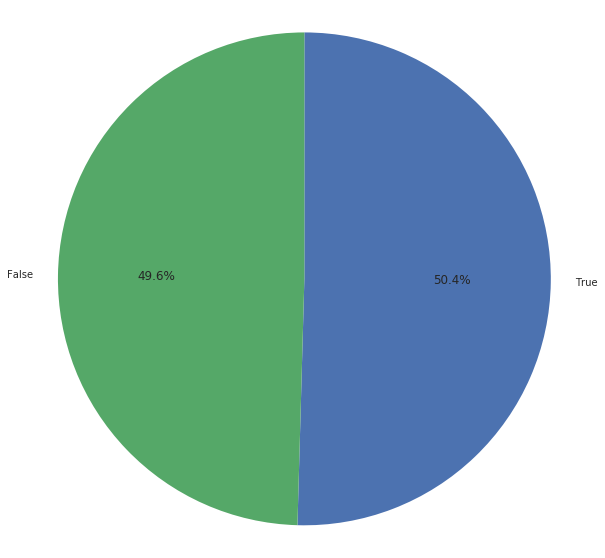

In [29]:
# create a pie chart
sorted_counts = df_prosper['IsBorrowerHomeowner'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, autopct='%1.1f%%');
plt.axis('square');

**Observation: It shows that there is almost an equal distribution of homeowners and non-homeowners. Homeowners are just 4% more.**

<a id='term'></a>
### 7. Variable of Interest - Term


**How does the distributuion of loan term look like?**

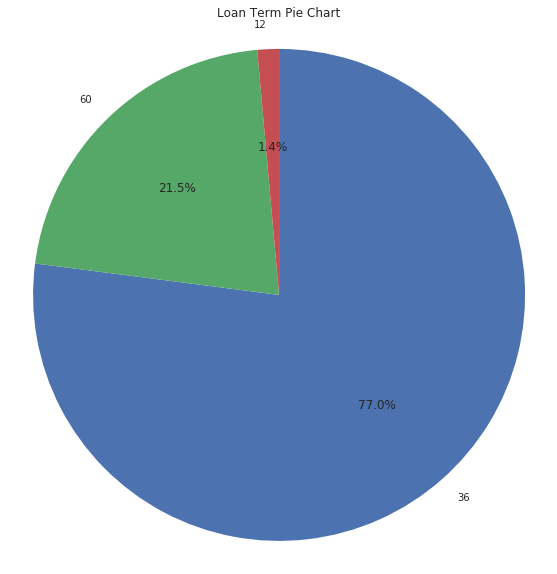

In [30]:
# create a pie chart
sorted_counts = df_prosper['Term'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, autopct='%1.1f%%');
plt.axis('square')
plt.title('Loan Term Pie Chart');

**Observation: It shows that majority of the loans have a term of 36 months or 3 years. Less than 2% of the total loans have a term of 12 months or 1 year.**

<a id='incomerange'></a>
### 8. Variable of Interest - IncomeRange

**How does the distribution of IncomeRange look like?**

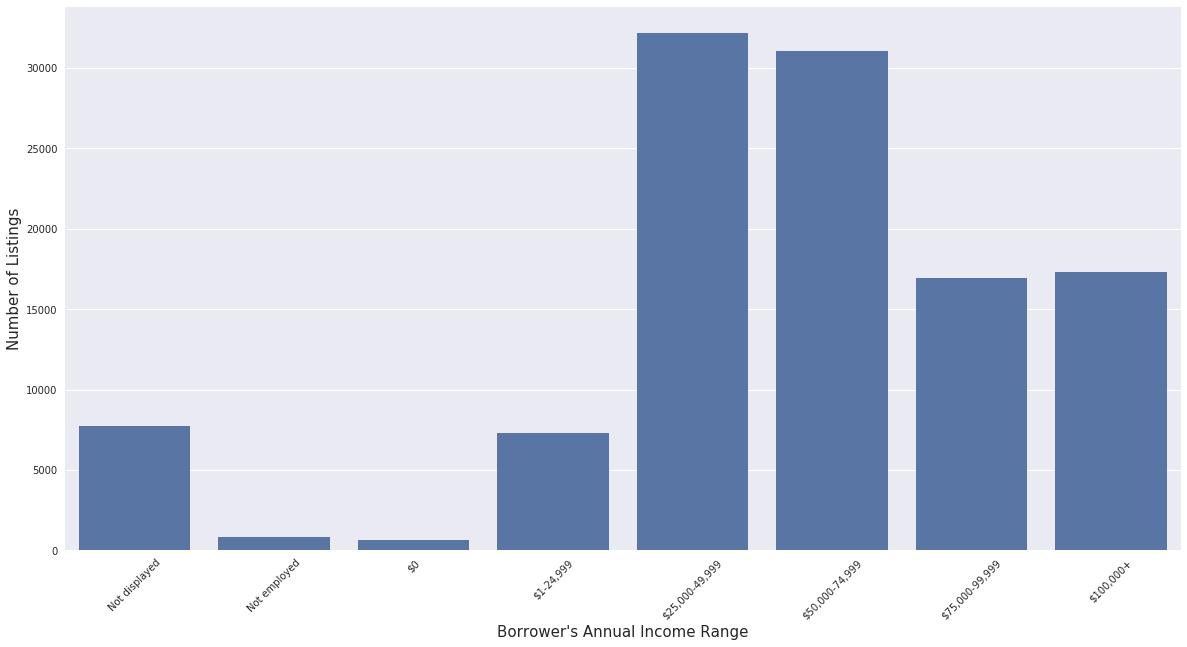

In [31]:
# create a bar chart, use base_color, add labels
base_color = sb.color_palette()[0]
range_bar = sb.countplot(data=df_prosper, x = 'IncomeRange', color = base_color);
range_bar.set_xlabel("Borrower's Annual Income Range", fontsize = 15);
range_bar.set_ylabel("Number of Listings", fontsize = 15);
plt.xticks(rotation = 45);

**Observation: It shows that the top two most annual income ranges are USD 25,000-49,999 and USD 50,000-74,999 respectively. It's interesting to see that a little above 1% belongs to the loans taken by those not employed and with income range of USD 0.**

<a id='delinquent'></a>
### 9. Variable of Interest - AmountDelinquent

**How does the distribution of AmountDelinquent look like? I wanted to see the distribution of AmountDelinquent that are over USD 10,000.**

In [32]:
df_prosper['AmountDelinquent'].describe()

count    113937.000000
mean        918.646866
std        6919.065398
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      463881.000000
Name: AmountDelinquent, dtype: float64

In [33]:
# filter data having AmountDelinquent that are over USD 10000
df_delinquent = df_prosper[df_prosper['AmountDelinquent'] > 10000]
df_delinquent['AmountDelinquent'].describe()

count      2584.000000
mean      31172.356424
std       33651.013692
min       10006.000000
25%       13427.500000
50%       19661.500000
75%       33557.750000
max      463881.000000
Name: AmountDelinquent, dtype: float64

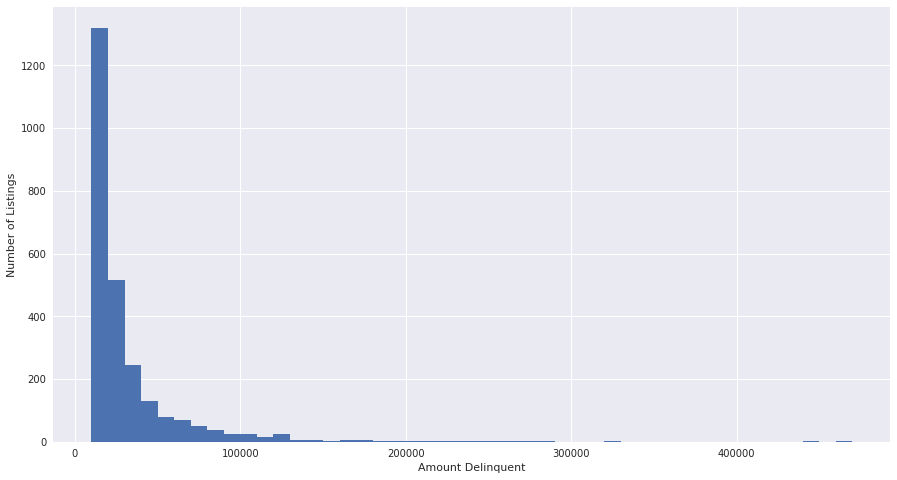

In [34]:
bins = np.arange(10000, df_delinquent['AmountDelinquent'].max()+10000, 10000)
plt.figure(figsize=[15, 8])
plt.hist(data=df_delinquent, x = 'AmountDelinquent', bins = bins);
plt.xlabel('Amount Delinquent');
plt.ylabel('Number of Listings');

**Observation: There are 2584 loans with delinquent or past due amounts that are over USD 10000. The histogram shows a very steep line on the USD 10,000 to USD 20,000 range then it goes down as the amount increases. It's interesting to see though that about a hundred of loans are delinquent in the amounts of over USD 100,000.00.**

<a id='year'></a>
### 10. Variable of Interest - LoanOriginationYear

**How does the distribution of loans based on loan origination year look like? Which year has the most number of loans?**

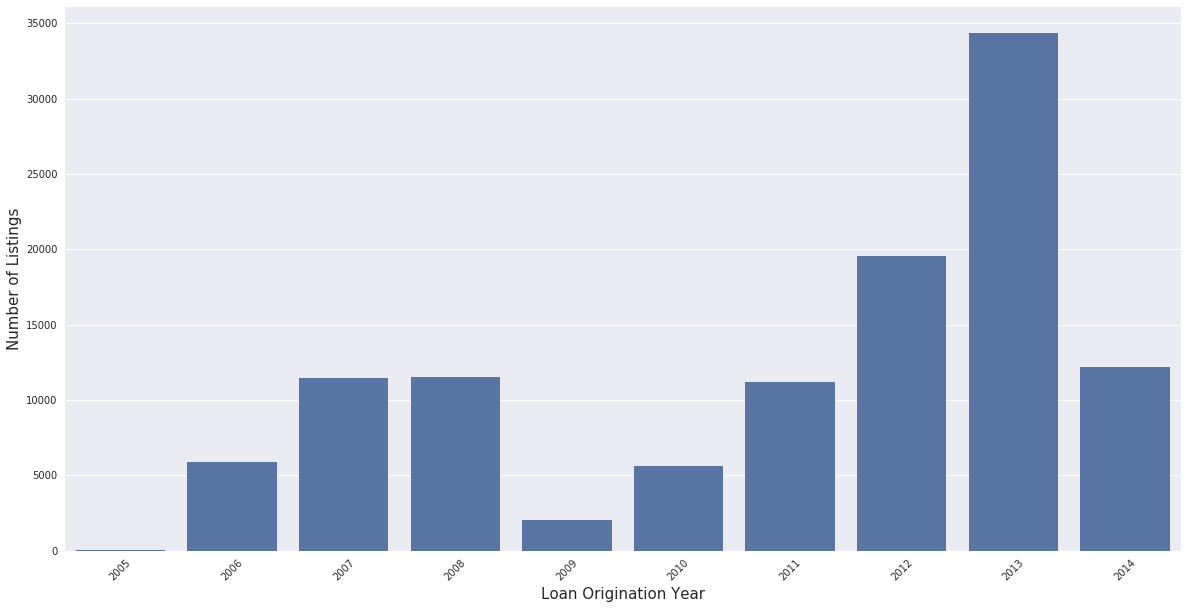

In [35]:
# create a bar chart, use base_color, add labels
base_color = sb.color_palette()[0]
range_bar = sb.countplot(data=df_prosper, x = 'LoanOriginationYear', color = base_color);
range_bar.set_xlabel("Loan Origination Year", fontsize = 15);
range_bar.set_ylabel("Number of Listings", fontsize = 15);
plt.xticks(rotation = 45);

**Observation: The bar chart shows that between the years 2005 and 2014, there was a very high amount of loan origination in 2013, followed by 2012.**

<a id='univariate_inference'></a>
## Inferences in Univariate Exploration

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- For the borrower rate, most loans have borrower rate between 5 and 40%. After adjusting the bins, It looks unimodal with high peak between 15-16% then there is also a very high peak at 31-32%.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?


- For the loan amount, after adjusting the bins, it showed that the top 3 loan amounts are USD 4,000.00, USD 15,000.00 and USD 10,000.00 respectively.
- For the Prosper rating distribution, I needed to plot the distribution of data with only non-null values in Prosper Rating column only. With 29084 null values, it would just distort the analysis and provide poor visualization. 
- For the distribution of loans based on origination year, I created a new column LoanOriginationYear to store the extracted year from loan origination date.
- There is a significant number of loans which has the lowest rating HR (high risk) which I find unusual. If I am the investor I would definitely not invest in loans listed as high risk rating.
- A little above 1% of the loans are taken by the borrowers who are unemployed and with income range of USD 0.
- It's surprising to see that about a hundred of loans are delinquent in the amounts of over USD 100,000.00

<a id='bivariate'></a>
## Bivariate Exploration

In the Bivariate Exploration, I will be investigating the following relationships:

1. Pairwise Correlations between numeric variables
2. BorrowerRate | ProsperRating (Alpha)
3. BorrowerRate | ProsperScore
4. BorrowerRate | IncomeRange
5. BorrowerRate | IsBorrowerHomeowner
6. BorrowerRate | EmploymentStatus
7. LoanOriginalAmount against Categorical Variables: ProsperRating (Alpha), EmploymentStatus and IncomeRange
8. LoanOriginalAmount | LoanStatus
9. LoanOriginalAmount | ListingCategory
10. MonthlyLoanPayment | IncomeRange
11. LoanOriginalAmount | IsBorrowerHomeowner
12. BorrowerRate | DebtToIncomeRatio | LenderYield
13. LoanOriginalAmount | LoanOriginationYear
14. LoanOriginalAmount | DebtToIncomeRatio | AmountDelinquent
15. categorical variables: LoanStatus | IncomeRange | ProsperRating (Alpha)

<a id='pairwise'></a>
### 1. Pairwise Correlations between numeric variables

- How do the correlations between numeric variables look like? 
- Which pairs have positive and negative correlation? Stong or week correlation? Which ones show no correlation at all?

> Since it involves EstimatedReturn and ProsperScore, I will be using both df_prosper and df_prosper_rating in the correlation plots

In [36]:
# create numeric variables list
numeric_vars = ['LoanOriginalAmount', 'MonthlyLoanPayment', 'Term', 'BorrowerRate', 'LenderYield', 'EstimatedReturn', 
                'ProsperScore', 'CurrentDelinquencies', 'AmountDelinquent', 'DebtToIncomeRatio', 'TotalProsperLoans', 
                'Investors']

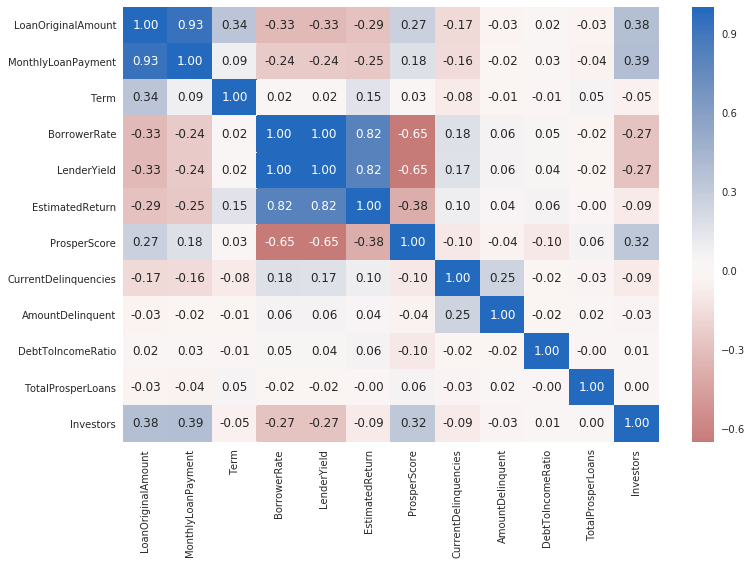

In [37]:
# correlation plot df_prosper numerical variables
plt.figure(figsize = [12, 8])
sb.heatmap(df_prosper[numeric_vars].corr(), annot = True, fmt = '.2f',
           cmap = 'vlag_r', center = 0)
plt.show()

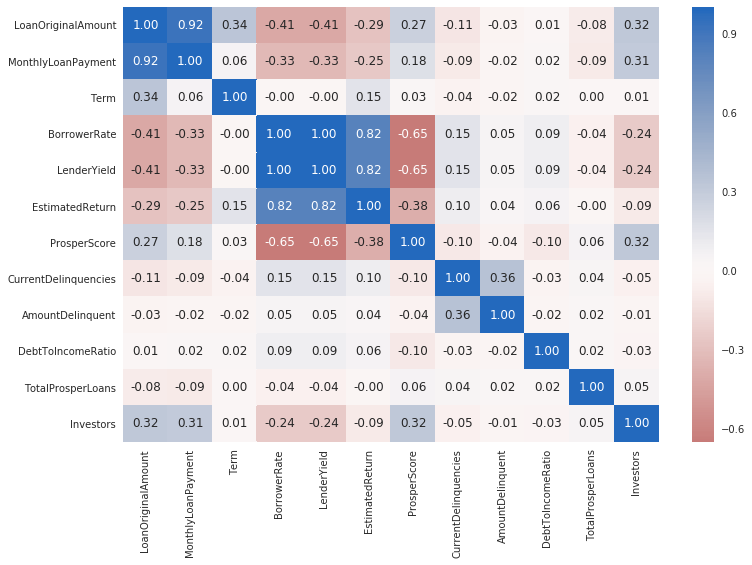

In [38]:
# correlation plot df_prosper_rating numerical variables
plt.figure(figsize = [12, 8])
sb.heatmap(df_prosper_rating[numeric_vars].corr(), annot = True, fmt = '.2f',
           cmap = 'vlag_r', center = 0)
plt.show()

**Observations:**

There's not much difference between the two plots.

<br>1. Obviously there is an absolute positive correlation between BorrowerRate and LenderYield. Lender yield or investor yield is equal to borrower rate minus the investor servicing fee.<br>
<br>2. Undeniably, there is also a strong positive relationship between LoanOriginalAmount and MonthlyLoanPayment.<br>
<br>3. There is also a strong positive correlation between BorrowerRate and EstimatedReturn. Estimated return is basically the difference between the Estimated Effective Yield and the Estimated Loss Rate. Estimated Effective Yield is the BorrowerRate minus the servicing fee rate minus estimated uncollected interest on charge-offs plus estimated collected late fees. Estimated loss is the estimated principal loss on charge-offs. Applicable for loans originated after July 2009.<br>
<br>4. There is quite a strong negative correlation between ProsperScore and BorrowerRate and between ProsperScore and LenderYield. However, I expected a stronger correlation as I thought that lenders would give higher interest rate if the credit score of the borrower is poor and vice versa.<br>
<br>5. The DebtToIncomeRatio has a very weak to almost no correlation at all with other variables. Just a week negative correlation with ProsperScore.<br>
<br>6. The TotalProsperLoans also has a very weak to almost no correlation at all with other variables.<br>
<br>7. The number of investors has a weak positive correlation with ProsperScore, MonthlyLoanPayment and LoanOriginalAmount. It looks like the higher the ProsperScore, MonthlyLoanPayment and LoanOriginalAmount, the more investors invest in loans. On the other hand, Investors has a weak negative correlation with BorrowerRate and LenderYield. <br>
<br>8. CurrentDelinquencies and AmountDelinquent have a week positive correlation with each other. Though I expected a stronger correlation as these variables are all about past due loans.<br>
<br>9. As expected, the LoanOriginalAmount has a strong positive correlation with MonthlyLoanPayment. It also has a weak positive correlation with Term and Investors. But its relationships with BorrowerRate and LenderYield are both weak negative. 

To quantify how strong the correlation is between the variables, we use a correlation coefficient. Pearson correlation coefficient (r) captures linear relationships. It is a value ranging from -1 to +1. A positive value of r indicates the increase in one variable tends to increase another variable. On the other hand, a negative r means the increase in one variable tends to cause a decrease in another variable. A value close to 0 indicates a weak correlation, and a value close to -1 and +1 indicates a strong correlation.

<a id='rate_rating'></a>
### 2. BorrowerRate | ProsperRating (Alpha)

- As the main feature of interest, I would like to see how BorrowerRate is affected by Prosper rating. For this investigation, I will be using df_prosper_rating dataframe.

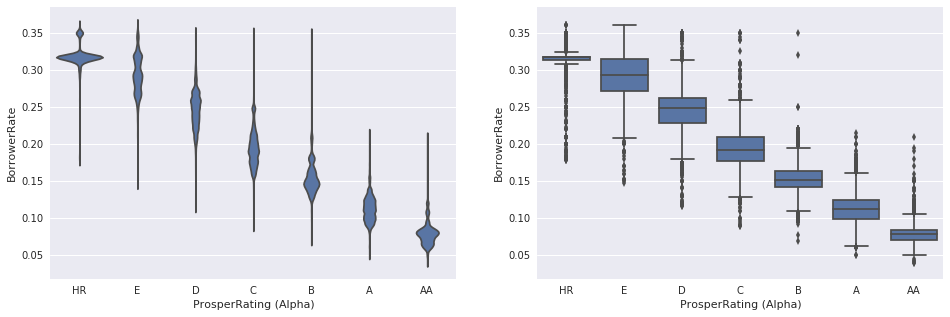

In [39]:
# create 2 subplots
plt.figure(figsize = [16, 5])
base_color = sb.color_palette()[0]

# create violin plot - left
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = df_prosper_rating, x = 'ProsperRating (Alpha)', y = 'BorrowerRate', 
                    color = base_color, inner = None);

# create box plot - right
plt.subplot(1, 2, 2)
sb.boxplot(data = df_prosper_rating, x = 'ProsperRating (Alpha)', y = 'BorrowerRate', color = base_color)

# set y-axis limits to be same as y-axis on the left plot
plt.ylim(ax1.get_ylim()); 

**Observation: Based on both the violin and box plots, the borrower rate has a negative correlation with Prosper rating. Both plots show that the higher the borrower rate, the lower the rating and obviously, when the rating is high, the borrower rate is low. This is what I expected as it common knowledge that if a borrower has a good rating, he can then get a lower interest rate. It means that based on the rating, he has a good credit standing and payment history.**

<a id='rate_score'></a>
### 3. BorrowerRate | ProsperScore

- Next is I would like to see how BorrowerRate is affected by Prosper score. Again, df_prosper_rating will be used.

In [40]:
df_prosper_rating[['ProsperScore', 'BorrowerRate']].describe()

,ProsperScore,BorrowerRate
count,84853.000000,84853.000000
mean,5.950067,0.196022
std,2.376501,0.074631
min,1.000000,0.040000
25%,4.000000,0.135900
50%,6.000000,0.187500
75%,8.000000,0.257400
max,11.000000,0.360000


/opt/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:968: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])


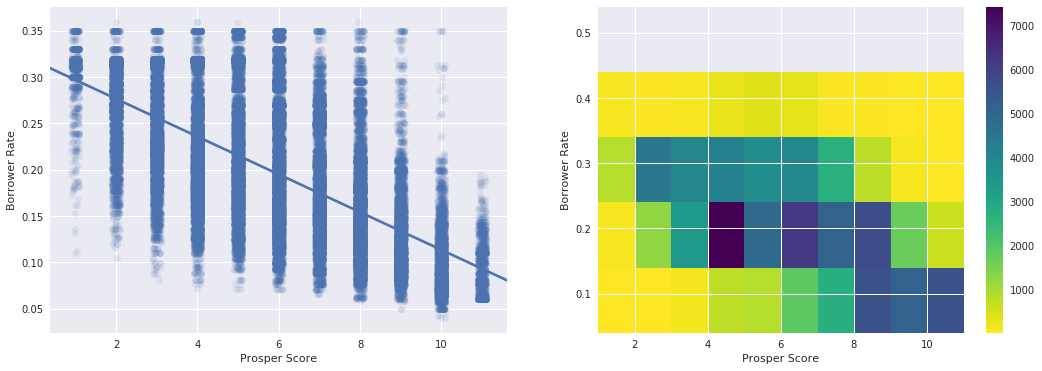

In [41]:
plt.figure(figsize = [18, 6])

# create scatterplot
plt.subplot(1, 2, 1)
sb.regplot(data = df_prosper_rating, x = 'ProsperScore', y = 'BorrowerRate', x_jitter = 0.1, 
           scatter_kws={'alpha':1/10}, fit_reg = True)
plt.xlabel('Prosper Score')
plt.ylabel('Borrower Rate');

# create heatmap
bins_x = np.arange(df_prosper_rating['ProsperScore'].min(), df_prosper['ProsperScore'].max()+1, 1)
bins_y = np.arange(df_prosper_rating['BorrowerRate'].min(), df_prosper['BorrowerRate'].max()+0.10, 0.10)

plt.subplot(1, 2, 2)
plt.hist2d(data = df_prosper, x = 'ProsperScore', y = 'BorrowerRate', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('Prosper Score')
plt.ylabel('Borrower Rate');

**Observation: Same with Prosper rating, borrower rate has a negative correlation with Prosper score based on both scatterplot and heatmap. The scatterplot shows that the slope is negative - the higher the borrower rate, the lower the Prosper score. The heatmap shows a negative trend as well with one area of high frequency at the lower right part.**

<a id='rate_incomerange'></a>
### 4. BorrowerRate | IncomeRange

- I would like to see the relationship of BorrowerRate against categorical variable IncomeRange thorugh faceting.

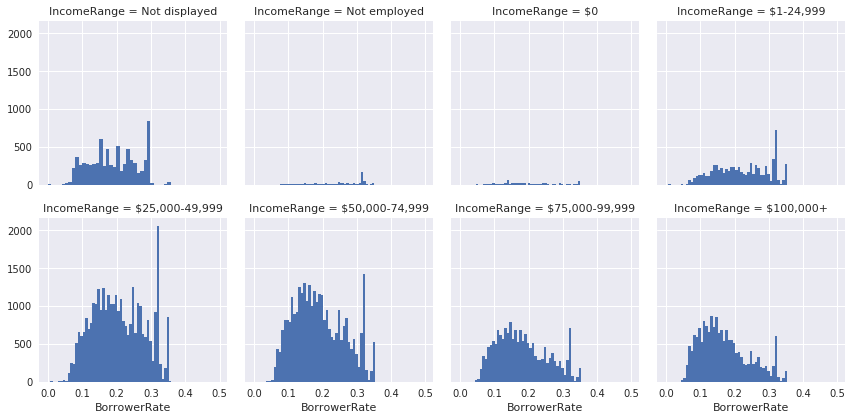

In [42]:
g = sb.FacetGrid(data = df_prosper, col = 'IncomeRange', col_wrap = 4);
g.map(plt.hist, 'BorrowerRate', bins = 50);

**Observations:**

<br>1. As the way I see it, income range USD 25,000-49,999 and USD 50,000-74,999 have the most number of loans as was also interpreted in the univariate exploration above, followed by income range USD 75,000-99,999 and USD 100,000.<br>
<br>2. Most of the loans are distributed from somewhere 5% up to 31-32% borrower rate. And there are peaks somewhere between 30-32%. Higher income ranges are more distributed to lower borrower rates (10-20%) and lower income range is plotted mostly on high borrower rates. <br>
<br>3. I cannot interpret the not displayed income range but it only shows that in Prosper, you can still get loans even if you don't specify your income or no income at all.<br>

<a id='rate_homeowner'></a>
### 5. BorrowerRate | IsBorrowerHomeowner

- I would like to see the relationship of BorrowerRate against categorical variable IsBorrowerHomeowner through faceting.

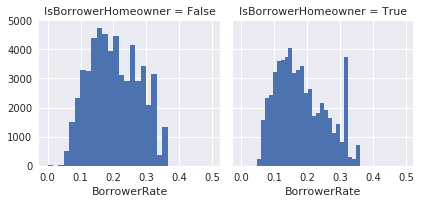

In [43]:
g = sb.FacetGrid(data = df_prosper, col = 'IsBorrowerHomeowner', col_wrap = 2);
g.map(plt.hist, 'BorrowerRate', bins = 30);

**Observation: I don't see that much difference on the relationship between borrower rate and the condition that the borrower is a homeowner or not. I guess whether you are a homeowner or not, you have equal chances of getting loans with fair borrower rate.**

<a id='rate_empstat'></a>
### 6. BorrowerRate | EmploymentStatus

- I would like to see the relationship of BorrowerRate against categorical variable EmploymentStatus through faceting.

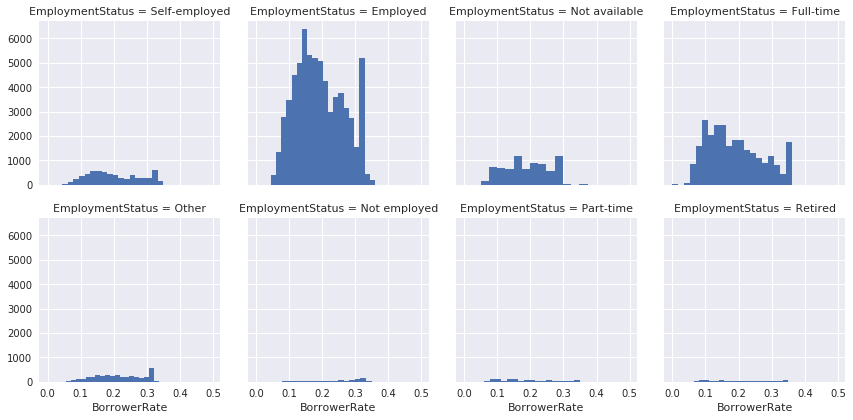

In [44]:
g = sb.FacetGrid(data = df_prosper, col = 'EmploymentStatus', col_wrap = 4);
g.map(plt.hist, 'BorrowerRate', bins = 20);

**Observations:**

<br>1. As expected most loans are granted to those who are employed and full-time but as to borrower rate, it's distributed well between 10-30% borrower rate. <br>
<br>2. For the not available, I can see that it has a wide range of borrower rate, looks like from minimum to maximum rate. <br>
<br>3. I actually expect that those unemployed will get higher borrower rate something like from 30% onwards but here it shows that the unemployed also get borrower rate of as low as 5%- almost at par with part timers.<br>

<a id='loanamt_categorical'></a>
### 7. LoanOriginalAmount | ProsperRating (Alpha) | EmploymentStatus | IncomeRange

- Next I want to investigate the relationship of LoanOriginalAmount against categorical variables ProsperRating (Alpha), EmploymentStatus and IncomeRange. And again, df_prosper_rating will be used.

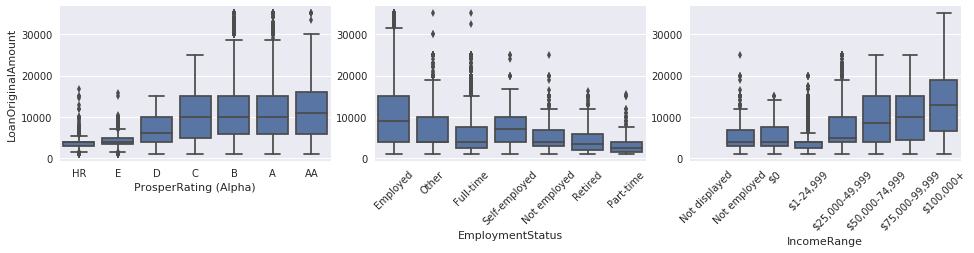

In [45]:
# plot matrix of numeric feature LoanOriginalAmount against categorical features.
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x = x, y = y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = df_prosper_rating, y_vars = ['LoanOriginalAmount'], 
                x_vars = ['ProsperRating (Alpha)', 'EmploymentStatus', 'IncomeRange'], size = 3, aspect = 1.5,)
g.map(boxgrid)
# rotate the x axes for plots 2 and 3 using flat method
for ax in g.axes.flat[1:3]:
    ax.tick_params(axis = 'x', rotation = 45)
plt.show();

**Observations:**

<br>1. I find it reasonable that majority of the loan amounts from USD 4,000 to USD 15,000 have the ratings of AA, A, B and C. The low ratings E and HR appear to be having a few loans in the amount below USD 5,000. Although there are some outliers for these low ratings, you can see that there are some loans in between USD 5,000 and below USD 20,000. I just don't quite understand right now, how could be that an HR or an E rating still result to loan originations.<br>
<br>2. I find it usual that majority of the loans amounts from USD 4,000 to USD 15,000 are granted to those employed. Borrowers that are retired and part timers get the lowest loan amount, which I find it reasonable. And it also shows that those unemployed also get loans somewhere from USD 4,000 to USD 8,000. It is interesting to see a few outliers for unemployed especially the ones above USD 20,000.<br>
<br>3. Borrowers with income range of USD 100,000+ get most of the highest loan amounts up to just a little below USD 20,000, followed by those with income range of USD 75,000-99,999 and USD 50,000-74,999 which I expect to see. And again, it is interesting to see a few outliers for unemployed especially the ones above USD 20,000.<br>

<a id='loanamt_stat'></a>
### 8. LoanOriginalAmount | LoanStatus

- Next I want to investigate the relationship of LoanOriginalAmount against categorical variable LoanStatus

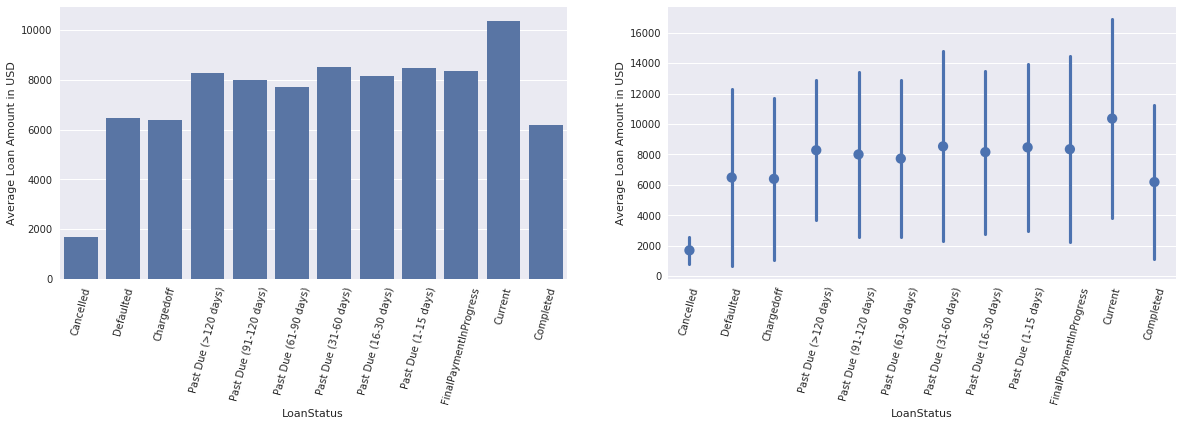

In [46]:
plt.figure(figsize = [20, 5])
base_color = sb.color_palette()[0]

#create left plot - adapted bar chart
plt.subplot(1, 2, 1)
sb.barplot(data = df_prosper, x = 'LoanStatus', y = 'LoanOriginalAmount', color=base_color, errwidth = 0)
plt.xticks(rotation = 75);
plt.ylabel('Average Loan Amount in USD');

# create right plot -point plot
plt.subplot(1, 2, 2)
sb.pointplot(data = df_prosper, x = 'LoanStatus', y = 'LoanOriginalAmount', color=base_color, ci='sd', linestyles="")
plt.xticks(rotation = 75);
plt.ylabel('Average Loan Amount in USD');


**Observation: Based on both plots, loans with the highest average amount of around USD 12,000 are in current status. And loans with the lowest average amount are in cancelled status. However, the past due loans have average amounts of more or less USD 8,000.**

<a id='loanamt_cat'></a>
### 9. LoanOriginalAmount | ListingCategory

- Next I want to investigate the relationship of LoanOriginalAmount against categorical variable ListingCategory

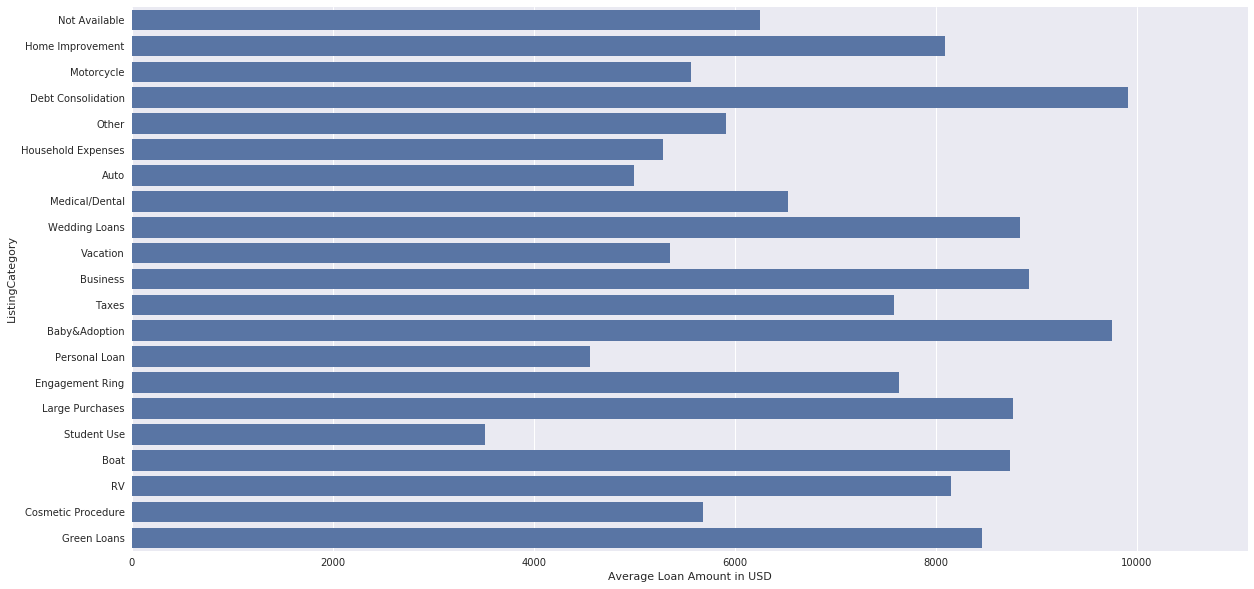

In [47]:
# create adapted bar chart
sb.barplot(data = df_prosper, x = 'LoanOriginalAmount', y = 'ListingCategory', color=base_color, errwidth = 0)
plt.xlabel('Average Loan Amount in USD');

**Observation: The top 2 categories with highest average loan amount of a little below USD 10,000 are Debt Consolidation and Baby & Adoption. The category that has the lowest average loan amount of around USD 3,500 is Student Use. Home Improvement, Wedding Loans, Business, Larges Purchases, Boat, RV, Green Loans are the categories which have loans with average amount of above USD 8,000.**

<a id='monthlypmt_incomerange'></a>
### 10. MonthlyLoanPayment | IncomeRange

- I would like to see the relationship of MonthlyLoanPayment against categorical variable IncomeRange thorugh faceting.

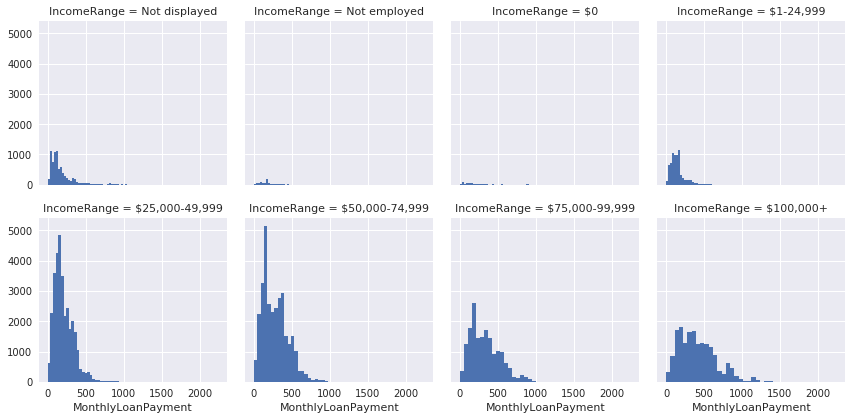

In [48]:
g = sb.FacetGrid(data = df_prosper, col = 'IncomeRange', col_wrap = 4);
g.map(plt.hist, 'MonthlyLoanPayment', bins = 40);

**Observation: I think it is usual to see that majority of monthly payments fall between USD 0 and 500. Although there are a few loans with monthly payments of more than USD 500 especially for larger income brackets, which I find it reasonable since obviously if you earn more than USD 50,000 annually then you can afford to pay a monthly payment of USD 1,000 or even USD 2,000. It is just interesting to know that there are a few with no income (or stated that they don't have an income) that have loans with monthly payment of above USD 1,000.**

<a id='loanamt_homeowner'></a>
### 11. LoanOriginalAmount | IsBorrowerHomeowner

- Next I want to investigate the relationship of LoanOriginalAmount against a condition whether the borrower is a homeowner or not.

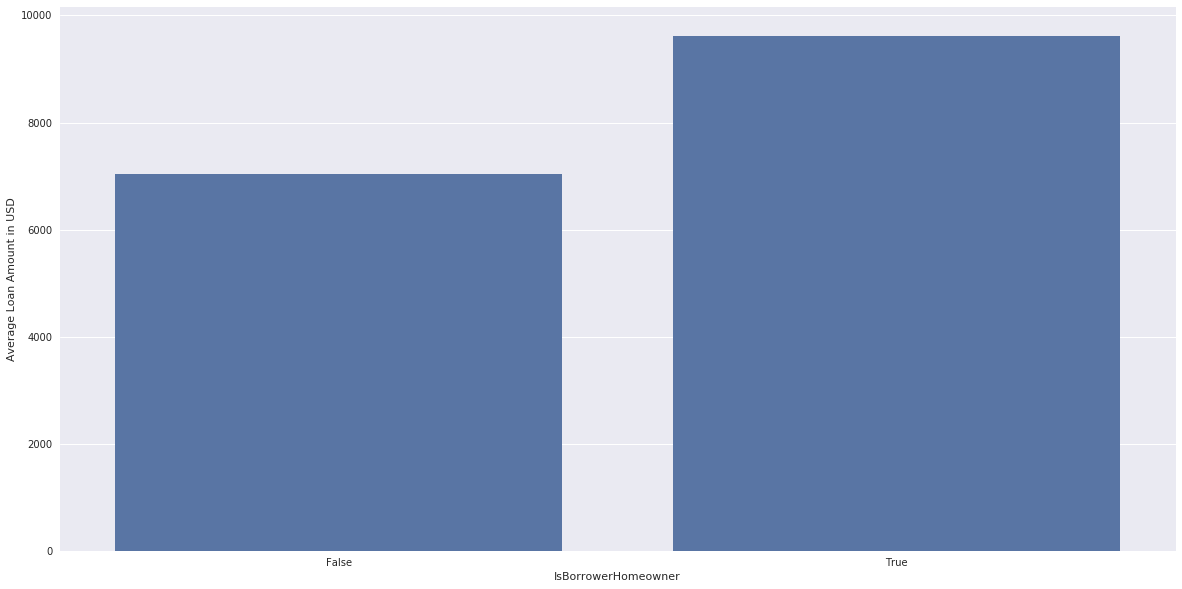

In [49]:
# create adapted bar chart
sb.barplot(data = df_prosper, x = 'IsBorrowerHomeowner', y = 'LoanOriginalAmount', color=base_color, errwidth = 0)
plt.ylabel('Average Loan Amount in USD');

**Observation: It shows that those who own a house get an average loan amount of USD 9,500. And those without their own house get loans with average amount of USD 7,000.**

<a id='rate_ratio_lenderyield'></a>
### 12. BorrowerRate | DebtToIncomeRatio | LenderYield
I am also interested to see the correlation of borrower rate and lender yield and how does debt to income ratio affect the borrower rate.

/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


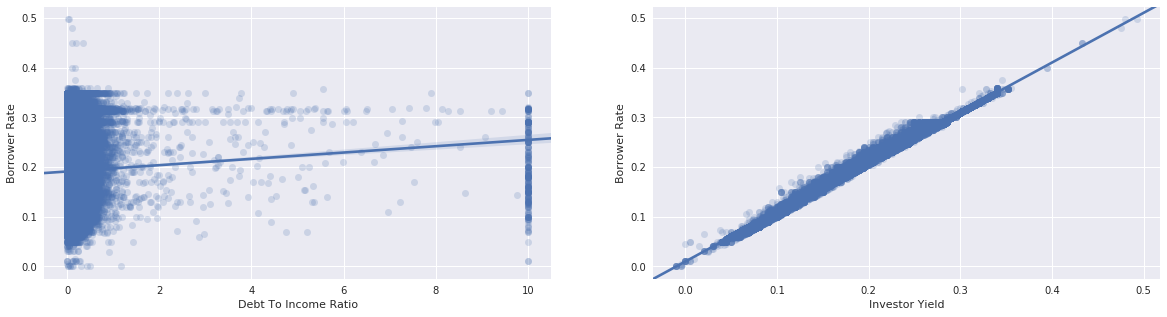

In [50]:
plt.figure(figsize = [20, 5])

#create scatterplot - debt-to-income ratio | borrower rate
plt.subplot(1, 2, 1)
ax3 = sb.regplot(data = df_prosper, x = 'DebtToIncomeRatio', y = 'BorrowerRate', scatter_kws={'alpha':1/5}, fit_reg = True)
plt.xlabel('Debt To Income Ratio')
plt.ylabel('Borrower Rate');

#create scatterplot - investor yield | borrower rate
plt.subplot(1, 2, 1)
plt.subplot(1, 2, 2)
sb.regplot(data = df_prosper, x = 'LenderYield', y = 'BorrowerRate', scatter_kws={'alpha':1/5}, fit_reg = True)
plt.xlabel('Investor Yield')
plt.ylabel('Borrower Rate');
plt.ylim(ax3.get_ylim()); 

**Observation:**

<br>1. The first plot shows a weak positive relationship between the borrower rate and debt to income ratio. Although I expected it to be stronger. It is also a risk for the lenders if the borrowers have high debt to income ratio. It shows here that majority have a low debt to income ratio of 0 to less than 1%. However, I can also see that there is a significant number that have a debt to income ratio of 10% which is actually the highest as it is capped at 10.01%.<br>
<br>2. Expectedly, on the second plot, there is a very strong positive relationship between borrower rate and investor yield. Investor yield is the interest income that the investors earn. Investor yield is equal to borrower rate plus investor servicing fee. So the positive slope is really expected.<br>

<a id='loanamt_year'></a>
### 13. LoanOriginalAmount | LoanOriginationYear 

- I also would like to see the average loans per year.

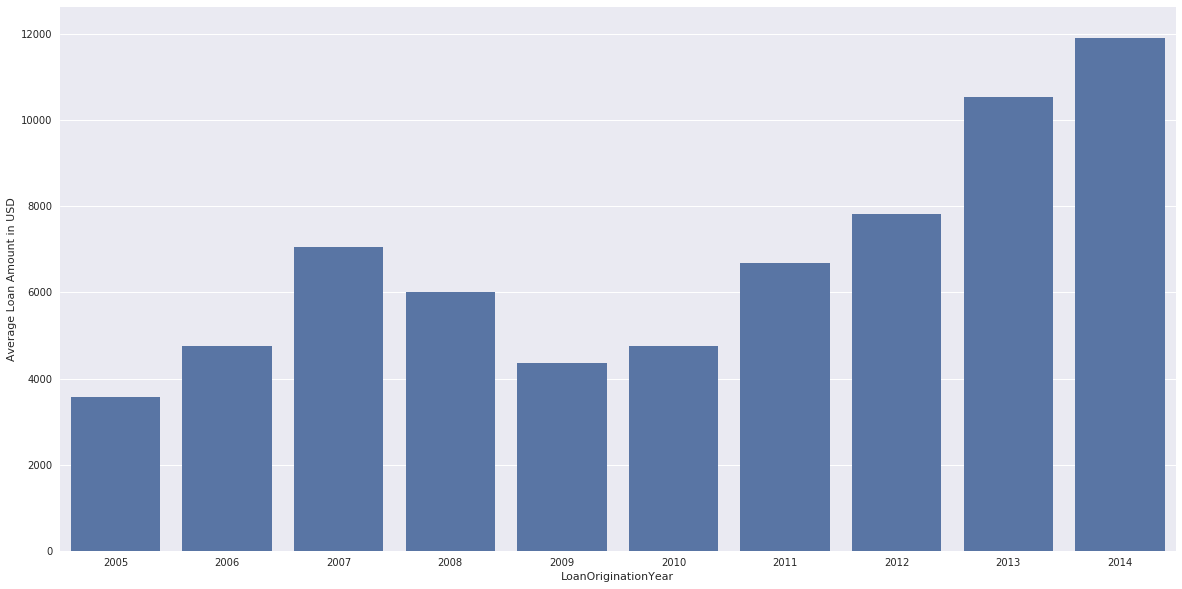

In [51]:
# create adapted bar chart
base_color = sb.color_palette()[0]
sb.barplot(data = df_prosper, x = 'LoanOriginationYear', y = 'LoanOriginalAmount', color = base_color, errwidth = 0)
plt.ylabel('Average Loan Amount in USD');

**Observation: There is nothing unusual. The company started in 2005, so it is given that 2005 has the smallest average loan amount. It started to have a continuous increase from 2011 onwards.**

<a id='loanamt_ratio_delinquent'></a>
### 14. LoanOriginalAmount | DebtToIncomeRatio | AmountDelinquent

- I am also interested to see the correlation of loan amount to debt-to-income ratio and to amount delinquent.

/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


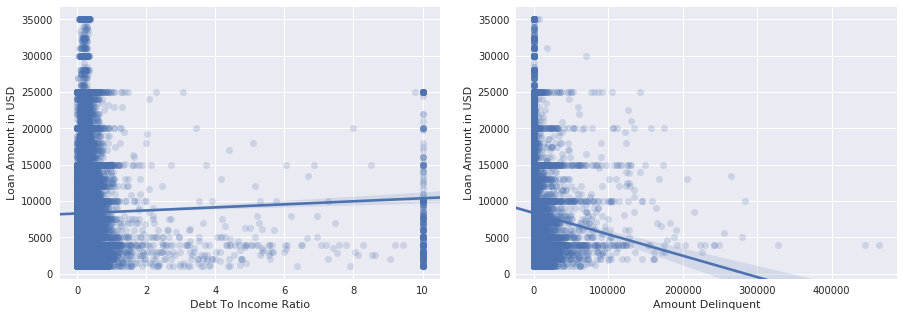

In [52]:
plt.figure(figsize = [15, 5])

#create scatterplot - loan amount | debt-to-income rato
plt.subplot(1, 2, 1)
ax4 = sb.regplot(data = df_prosper, x = 'DebtToIncomeRatio', y = 'LoanOriginalAmount', scatter_kws={'alpha':1/5}, 
                 fit_reg = True)
plt.xlabel('Debt To Income Ratio')
plt.ylabel('Loan Amount in USD');

#create scatterplot - loan amount | amount delinquent
plt.subplot(1, 2, 1)
plt.subplot(1, 2, 2)
sb.regplot(data = df_prosper, x = 'AmountDelinquent', y = 'LoanOriginalAmount', scatter_kws={'alpha':1/5}, fit_reg = True)
plt.xlabel('Amount Delinquent')
plt.ylabel('Loan Amount in USD');
plt.ylim(ax4.get_ylim()); 

**Observation:**

<br>1. Plot 1 shows a very weak positive correlation which I actually didn't expect as I thought it to have a negative correlation. But then I can somehow relate it to the top most stated purpose in securing loans which is debt consolidation.  So, borrowers take loans to pay up existing loans. <br>
<br>2. Plot 2 shows a negative slope which I find it normal. Borrowers with large past due balance will get a hard time securing a loan with a large amount. Although the plot also shows there are a good number of loans in the amounts between USD 4,000 and USD 25,000 that are with past due balance of mostly around USD 5,000 to USD 150,000.<br>

<a id='loanstat_incomeramge_rating'></a>
### 15. LoanStatus | IncomeRange | ProsperRating (Alpha)

- Investigating the three categorical variables: LoanStatus, IncomeRange and ProsperRating (Alpha).

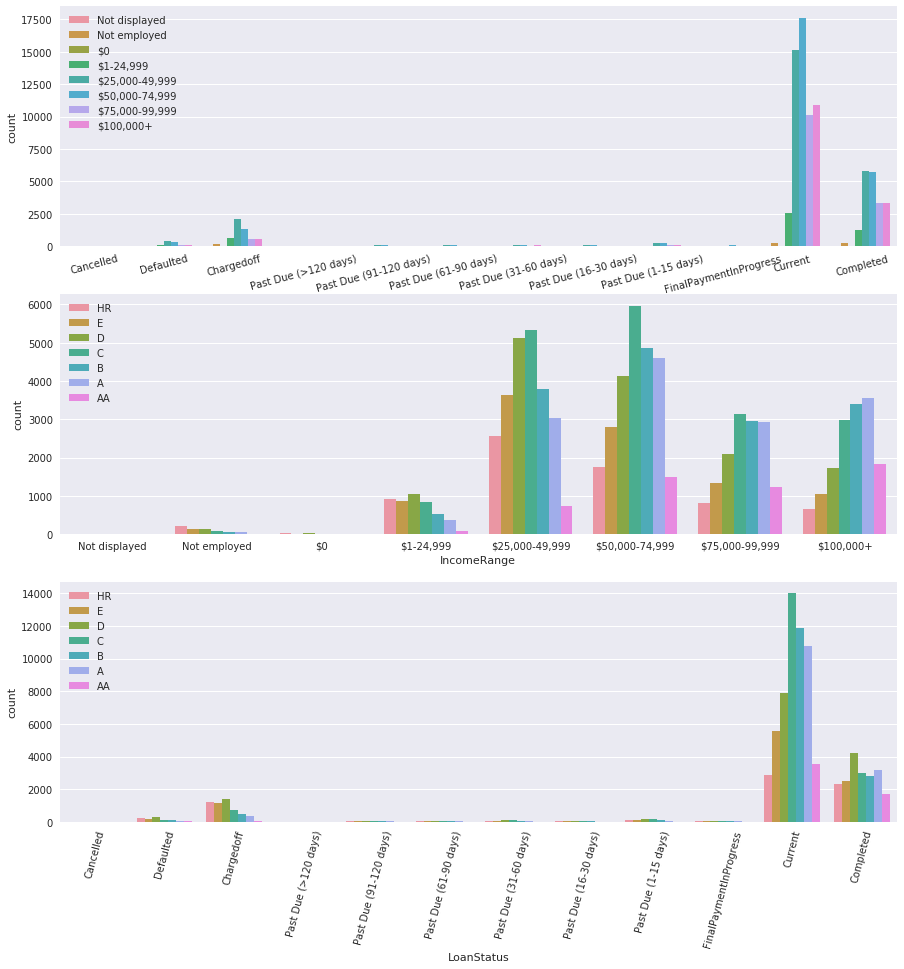

In [53]:
plt.figure(figsize = [15, 15])

# subplot 1: LoanStatus vs IncomeRange
ax = plt.subplot(3, 1, 1)
sb.countplot(data = df_prosper_rating, x = 'LoanStatus', hue = 'IncomeRange')
plt.xticks(rotation = 15);
ax.legend(loc = 2) # re-locate legend to reduce overlapping

# subplot 2: IncomeRange vs. ProsperRating
ax = plt.subplot(3, 1, 2)
sb.countplot(data = df_prosper_rating, x = 'IncomeRange', hue = 'ProsperRating (Alpha)')
ax.legend(loc = 2) # re-locate legend to reduce overlapping

# subplot 3: LoanStatus vs. ProsperRating
ax = plt.subplot(3, 1, 3)
sb.countplot(data = df_prosper_rating, x = 'LoanStatus', hue = 'ProsperRating (Alpha)')
plt.xticks(rotation = 75);
ax.legend(loc = 2) # re-locate legend to reduce overlapping

plt.show()

**Observations:**

<br>Plot 1 - LoanStatus vs. IncomeRange - It is expected that majority of the loans are current. These current loans are mostly taken by borrowers whose income range are USD 50,000 - 74,999 and USD 25,000 - 49,000. Surprisingly, For the charged off loans, around 2,400 loans were taken also by those whoe income range is USD25,000 -49,000 and around 1,400 loans were taken by those whose income range is USD 50,000 - 74,999.<br>
<br>Plot 2 - IncomeRange vs. ProsperRating - I am actually expecting higher Prosper rating for loans taken by borrowers whose income range is higher. But it turned out that this is not the case. For income range USD 25,000-49,000 the majority of the loans are with ratings D and C. Same goes with income range USD 50,000-74,999 the higest number of loans have rating C. And interestingly, for income range USD 25,000-49,000, USD 50,000-74,999, USD 75,000-99,999 and USD 100,000+, there are a significant number of loans with rating HR which is the lowest rating (high risk).<br>
<br>Plot 3 - LoanStatus vs. ProsperRating - Here is nothing unusal, for the current loans, majority are rating C, B and A which I think is normal. For completed loans, the ratings are almost equally distributed. For charged off loans, I can see that the majority are ratings HR, E and D which are the lowest ratings which I expect to see.<br>

<a id='bivariate_inference'></a>
## Inferences in Bivariate Exploration


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

<br>1. The borrower rate has a negative correlation with Prosper rating. The higher the borrower rate, the lower the rating and obviously, when the rating is high, the borrower rate is low. This is what I expected as it common knowledge that if a borrower has a good rating, he can then get a lower interest rate. It means that based on the rating, he has a good credit standing and payment history.<br>

<br>2. I expected a stronger negative correlation between borrower rate and Prosper score and between Prosper score and lender yield. The plot shows -.65 and I expected it to be higher.<br>



### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

<br>1. I also expected that the debt to income ratio will have strong correlations against the other features, but it turned out that all its relationships are very weak.<br>

<br>2. CurrentDelinquencies and AmountDelinquent have a week positive correlation with each other. Though I expected a stronger correlation as these variables are all about past due loans.<br>

<br>3. The condition of the borrower being a homeowner or not does not have an effect on the other variables. So whether you are a homeowner or not, you have equal chances of getting loans with fair borrower rate.<br>

<br>4. I expected that those unemployed will get higher borrower rate something like from 30% onwards but it shows that the unemployed also get borrower rate of as low as 5%- almost at par with part timers.<br>

<br>5. The Loan amount has positive relationship with Prosper rating and income range.<br>

<br>6. It is just interesting to know that there are a few with no income (or stated that they don't have an income) that have loans with monthly payment of above USD 1,000.<br>

<br>7. Interestingly, for income range USD 25,000-49,000, USD 50,000-74,999, USD 75,000-99,999 and USD 100,000+, there are a significant number of loans with rating HR which is the lowest rating (high risk).<br>

<a id='multivariate'></a>
## Multivariate Exploration

I will be investigating on the following: 

<br>1. The effects of two categorical variables, IncomeRange and ProsperRating on BorrowerRate.<br>
<br>2. The effects of IncomeRange and ProsperRating on number of Investors.<br>
<br>3. The effects of numeric variables lender yield and estimated return on the number of investors.<br>
<br>4. The effects of LoanOriginalAmount, BorrowerRate and ProsperScore on each other.<br>
<br>5. How the loan origination is affected by the AmountDelinquent and DebtToIncomeRatio.<br>

<a id='rate_incomerange_rating'></a>
### 1. BorrowerRate: IncomeRange | ProsperRating (Alpha)

- I want to see how borrower rate is affected by the two categorical variables income range and Prosper rating.

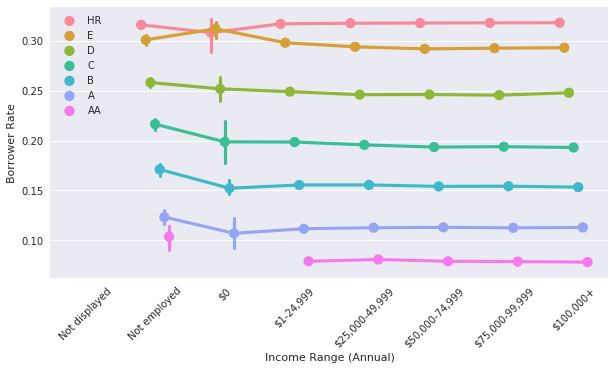

In [54]:
fig = plt.figure(figsize = [10,5])
ax = sb.pointplot(data = df_prosper, x = 'IncomeRange', y = 'BorrowerRate', hue = 'ProsperRating (Alpha)', dodge = 0.4)
ax.set_yticklabels([],minor = True)
plt.ylabel('Borrower Rate')
plt.xlabel('Income Range (Annual)');
ax.legend(loc = 2);
plt.xticks(rotation = 45);
plt.show();

**Observation: The borrower rate looks constant across income ranges. It shows a bit higher borrower rate for 'Not employed' than those with 'USD 0' income. Then it remains constant for the next income ranges. Higher borrower rates also have lower ratings. The highest rating of AA can be seen constant for those with income and has the lowest borrower rate - except for some outiers that can be seen in the 'Not employed'.**

<a id='investor_incomerange_rating'></a>
### 2. Investors: IncomeRange | ProsperRating (Alpha)

- I want to see what drives the investors to fund loans - is it driven by the income range or Prosper rating, or both?

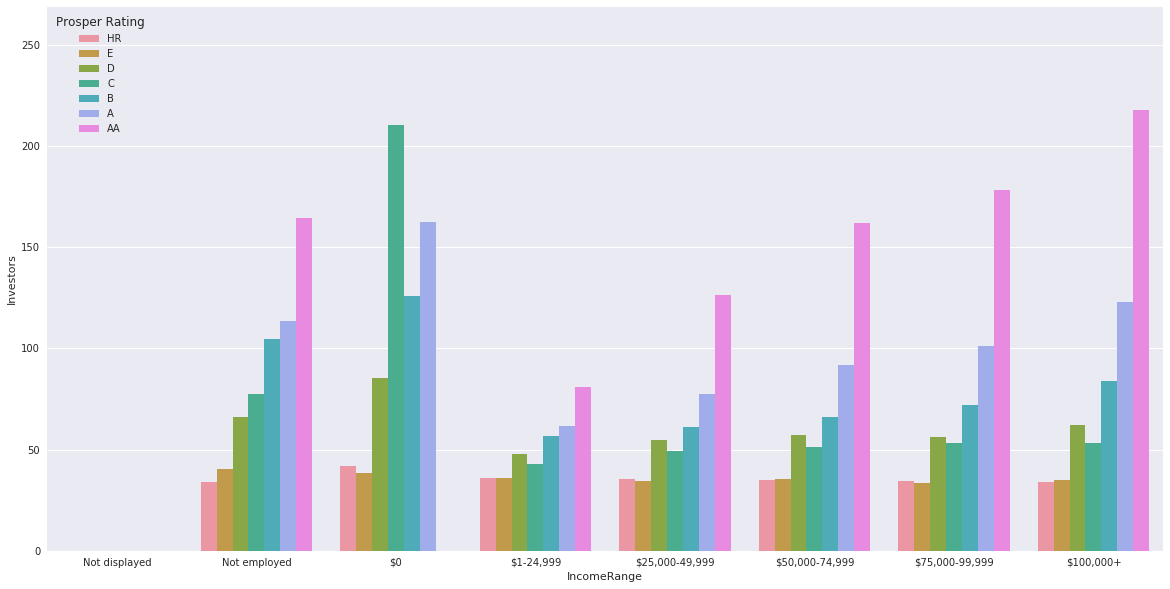

In [55]:
ax = sb.barplot(data = df_prosper, x = 'IncomeRange', y = 'Investors', hue = 'ProsperRating (Alpha)', errwidth = 0)
ax.legend(loc = 2, ncol = 1, framealpha = 1, title = 'Prosper Rating');

**Observation: I wanted to investigate what drives the investors to invest in the loans. In this bar chart, it shows that the number of investors has a positive relationship with Prosper Rating. The investors fund more on loans that have higher ratings. But surprisingly, while investors are funding the loans of those with high income range; there are also investors funding those unemployed and with 0 income.**

<a id='investor_yield_return'></a>
### 3. Investors | LenderYield | EstimatedReturn
- I also want to see how the number of investors is affected by the numeric variables lender yield and estimated return.

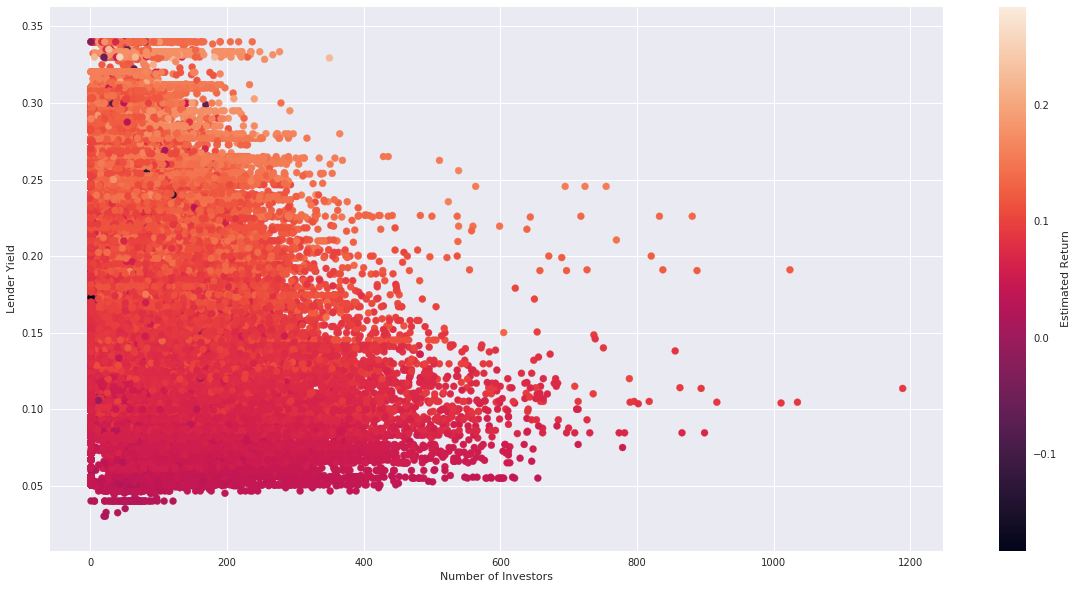

In [56]:
plt.scatter(data = df_prosper, x = 'Investors', y = 'LenderYield', c = 'EstimatedReturn')
plt.colorbar(label = 'Estimated Return');
plt.ylabel('Lender Yield')
plt.xlabel('Number of Investors');

**Observation: It looks like the investors are funding the loans on all levels of LenderYield, but many are investing in loans with lender yield between 5 and 15%. As for estimated return, majority of investors are funding the loans with estimated return of 10-20% although those loans with below 10% are also funded by a significant number of investors.**

<a id='loanamt_rate_score'></a>
### 4. LoanOriginalAmount | BorrowerRate | ProsperScore
- Another investigation on loan amount, borrower rate and Prosper score.

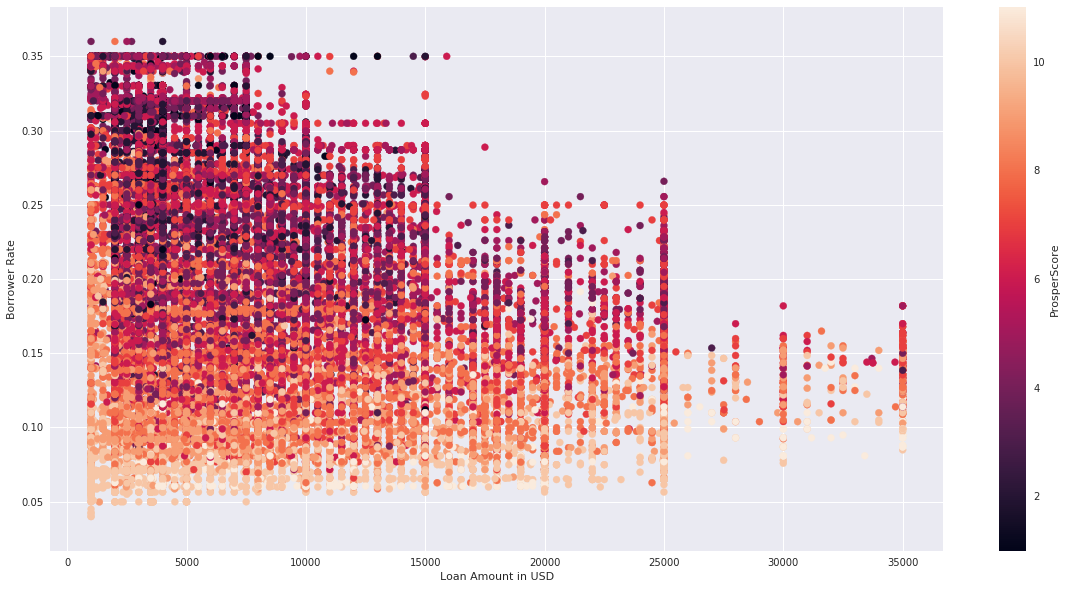

In [57]:
plt.scatter(data = df_prosper_rating, x = 'LoanOriginalAmount', y = 'BorrowerRate', c ='ProsperScore')
plt.colorbar(label = 'ProsperScore')
plt.xlabel('Loan Amount in USD')
plt.ylabel('Borrower Rate');

**Observation: The scatterplot shows darker on the upper part which indicates loans with lower Prosper score but higher borrower rate and majority of the dark plots are on the left side which are lower loan amount. The bottom part is lighter which indicates loans with higher Prosper score but with lower borrower rate and majority are on distributed between USD 1,000 to USD 20,000.**

<a id='loanamt_delinquent_ratio'></a>
### 5. LoanOriginalAmount | AmountDeliquent | DebtToIncomeRatio
- Another investigation on how the loan origination is affected by the amount delinquent and debt to income ratio. Both of these numerical data are computed at the time the credit profile of the borrower was pulled. 

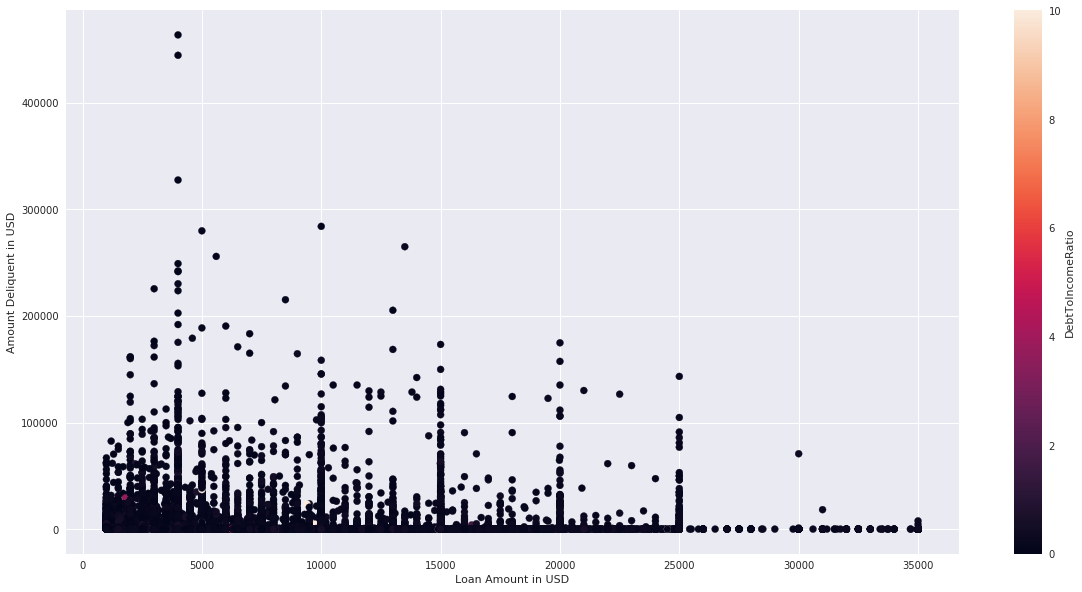

In [58]:
plt.scatter(data = df_prosper, x = 'LoanOriginalAmount', y = 'AmountDelinquent', c ='DebtToIncomeRatio')
plt.colorbar(label = 'DebtToIncomeRatio')
plt.xlabel('Loan Amount in USD')
plt.ylabel('Amount Deliquent in USD');

**Observation: The plot has dark points gathered mostly at the bottom which indicates loan originations for borrowers with 0.0 to very low debt to income ratio and with below USD 10,000 past due amount and the point are mostly on the left side which refers to loan amounts below USD 10,000. Straight lines can be seen for loan amounts of USD 4,000, USD 10,000, USD 20,000 and USD 25,000 which are the loan amounts most commonly taken by the borrowers. There are a few dots scattered above the USD 10,000 amount delinquent.**

<a id='multivariate_inference'></a>
## Inferences in Multivariate Exploration
 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

<br>1. The borrower rate as the main feature of interest has a strong positive relationship with lender yield and estimated return.<br>
<br>2. The borrower rate has also a strong negative relationship with Prosper score and Prosper rating, higher borrower rates have lower scores and ratings which I expected even before I started the exploration. <br>
<br>3. Loan amount is also affected by the borrower rate on the opposite direction. Lower loans tend to have higher borrower rate.<br>


### Were there any interesting or surprising interactions between features?


<br>1. The investors fund more on loans that have higher ratings. But surprisingly, while investors are funding the loans of those with high income range, there are also investors funding those unemployed and with 0 income.<br>
<br>2. The borrowers who successfully get loans are those with low debt to income ratio and low amount delinquent.<br>
<br>3. The origination of the loans is mostly affected by income range specifically those in USD 50,000-74,999, USD 75,000-99,999 and USD 100,000+ income range.<br>
<br>4. I didn't see a strong relationship between number of investors and lender yield and between number of investors and estimated return. I was expecting that more investors will fund loans that have high lender yield and estimated return.<br>

<a id='conclusion'></a>
## Conclusions

With so many variables to explore, here are the main findings I gathered during the data exploration:

<br>  1. As expected the borrower rate is strongly affected by Prosper rating and Prosper Score.<br>
<br>  2. Majority of the loans are for the purpose of debt consolidation, mostly are taken by those borrowers with higher income range and with full time jobs.<br>
<br>  3. However, there are investors who also fund loans for those borrowers who are unemployed or with USD 0 income.<br>
<br>  4. The past due amount, number of delinquencies and debt to income ratio don't have that much effect on loans.<br>
<br>  5. There is an equal opportunity for those who owns a house for those who don't.<br>
<br>  6. The number of investors is not necessarily affected by lender yield and estimated return.<br>